# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 1

# Business Understanding - 10 pts

Traffic accidents impact many of us in our daily lives. From being delayed due to an accident to being in an accident ourselves, anytime we are travelling there is a concern that a traffic accident could impact us. The US Accidents dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

This data could be leveraged for multiple purposes:

- Alerting drivers to when an accident may occur
- Providing insurance companies information on accident fequencies
- Assisting government agencies in future traffic pattern design and planning

A good prediction algorithm for this data would establish a relationship between the factors in this data file, such as weather, time of day, location, and the severity of an accidents occurrence. We would know if the algorithm was useful if it could successfully predict how severe an accident would be based on those variables. In knowing the severity, we could recommend to civic institutions how, where, and when to allocate the most resources for accidents. 


# Data Understanding - 80 pts
<Use Subsections as defined below>

Setup initial requirements for the data analysis prior to EDA. This is for cleanliness of the code base and consistency of outputs.

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble

#The packages below will need to be installed for use.
# sorted_months_weekdays allows for easier manipulation of date fields
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
import swifter

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

#set variables for font sizes for plots. This will allow them to be consistent within the notebook
titleFont = 25
axisFont = 15
labelFont = 15

Read in the datafile for analysis and perform a quick test to make sure we read the data in correctly

In [2]:
#read in the data file
df = pd.read_csv('us-accidents.zip')
df.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  Number  \
0  Right lane blocked due to accident on I-70 Eas...     NaN   
1  Accident on Brice Rd at Tussing Rd. Expect del...  2584.0   
2  Accident on OH-32 State Route 32 Westbound at ...     NaN   
3  Accident on I-75 Southbound at Exits 52 52B US...     NaN   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...     NaN   

                      Street Side          City      County State     Zipcode  \
0                     I-70 E    R        Dayton  Montgomery    OH       45424   
1                   Brice Rd    L  Reynoldsburg    Franklin    OH  43068-3402   
2             State Route 32    R  Williamsburg    Clermont    OH       45176   
3                     I-75 S    R        Dayton  Montgomery    OH       45417   
4  Miamisburg Centerville Rd    R        Dayton  Montgomery    OH       45459   

  Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0      US  US/Eastern         KFFO  2016-02-08 05:58:00            36.9   
1      US  US/Eastern         KCMH  2016-02-08 05:51:00            37.9   
2      US  US/Eastern         KI69  2016-02-08 06:56:00            36.0   
3      US  US/Eastern         KDAY  2016-02-08 07:38:00            35.1   
4      US  US/Eastern         KMGY  2016-02-08 07:53:00            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            NaN         91.0         29.68            10.0           Calm   
1            NaN        100.0         29.65            10.0           Calm   
2           33.3        100.0         29.67            10.0             SW   
3           31.0         96.0         29.64             9.0             SW   
4           33.3         89.0         29.65             6.0             SW   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0              NaN               0.02        Light Rain    False  False   
1              NaN               0.00        Light Rain    False  False   
2              3.5                NaN          Overcast    False  False   
3              4.6                NaN     Mostly Cloudy    False  False   
4              3.5                NaN     Mostly Cloudy    False  False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   
3     False     False     False    False    False       False    False  False   
4     False     False     False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0            False           False         False          Night   
1            False           False         False          Night   
2            False            True         False          Night   
3            False           False         False          Night   
4            False            True         False            Day   

  Civil_Twilight Nautical_Twilight Astron

## Data Meaning - 10 pts

The US Accidents dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

The code below provides a quick check on the shape of the data which will provide the number of rows in the data and number of data columns.

In [3]:
df.shape

(2974335, 49)

From the output above there are 2,974,335 rows of data with 49 initial data columns. 

To gain additional insight into the data, the data types of each column need to be understood. This allows for an understanding of whether the data is categorical or continuous. The code below will provide a summary count of all of the data type values as well as the individual listing of data types for each column

In [4]:
df.dtypes.value_counts()

object     21
float64    14
bool       13
int64       1
dtype: int64

In [5]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

A full summary of the data (Table 1) containing the following information is displayed below:
- column name
- column description
- number of unique values
- data type
- nullable attribution
- % data missing

In [6]:
HTML(filename='./Data Description.html')

## Data Quality - 15 pts

Assessing and addressing the quality of the data set is critical to ensuring a successful execution of further analysis. In this section data quality will be addressed by looking for and correcting: duplicate data and missing data.

Initially, we check the dataset for any data duplication. This will verify whether the data counts are truly as large as initially seen upon data loading.

In [7]:
#get the shape of the dataframe (number of rows, number of columns)
initShape = df.shape

#remove duplicates from the dataframe
df = df[~df.duplicated()]

#get the shape of the deduplicated dataframe (number of rows, number of columns)
dedupShape = df.shape

#Print out the shape of the initial dataframe, the deduplicated dataframe and 
#determine if there is any duplication in the data
print("Initial Shape: ", initShape)
print("Deduplication Shape: ", dedupShape)


if (initShape == dedupShape):
    print("No Duplicate Data Found")
else:
    print("Duplicate Data Found and removed")

Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found


As seen from the code execution above there is no duplication found within the data set.

From the initial analysis shown in Table 1 (above) the amount of missing data in the data set is relatively minimal. This section will provide additional verification and address the quality issues.

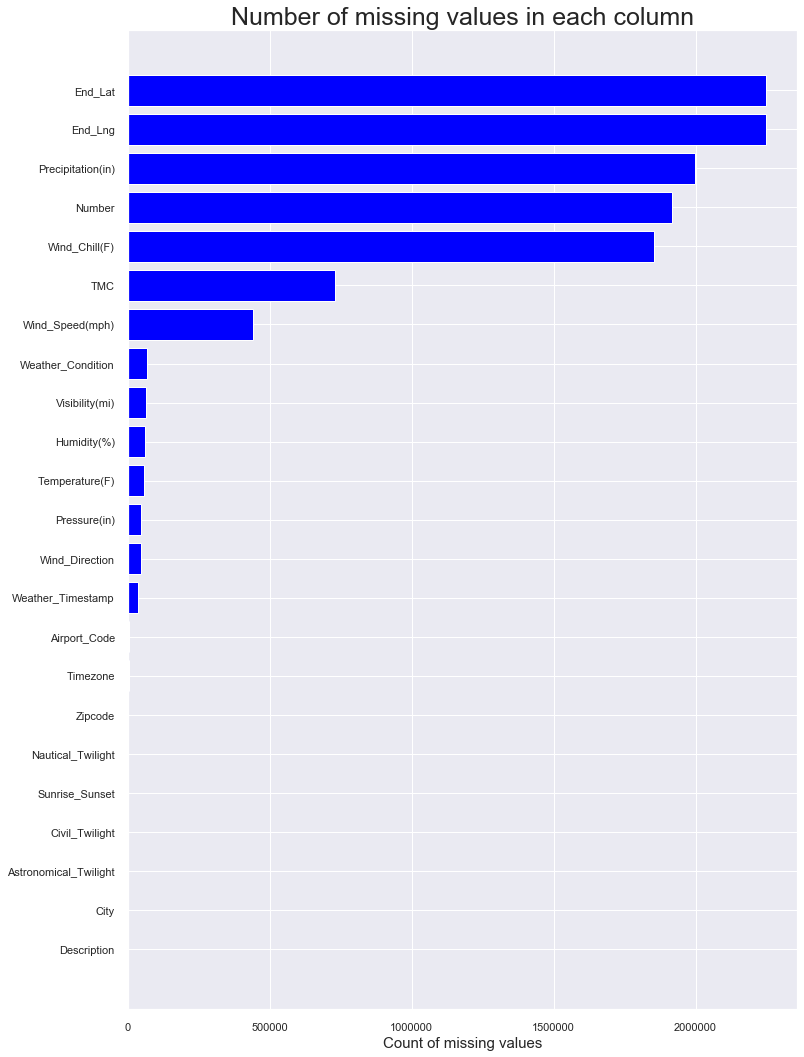

In [8]:
# Look for missing data and plot values for visuals
#missing_df = df.isnull().sum(axis=0).reset_index()
#missing_df.columns = ['column_name','missing_count']
#missing_df = missing_df.loc[missing_df['missing_count']>0]
#missing_df = missing_df.sort_values(by='missing_count')

#ind = np.arange(missing_df.shape[0])
#fig,ax = plt.subplots(figsize=(12,18))
#rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
#ax.set_yticks(ind)
#ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
#ax.set_xlabel("Count of missing values",fontsize=axisFont)
#ax.set_title("Number of missing values in each column",fontsize=titleFont)
#plt.show()

The visualization above confirms the information in Table 1. The columns: End_Lat, End_Long, Precipitation, Number, Wind Chill, TMC and Wind Speed all contain a large amount of missing data. 

Digging a bit deeper into this missing data will provide an indication and additional verification of how much data is missing. Build out a table listing the missing values and look for items with more than 15% missing data.

In [9]:
#Get table listing of missing values. Look for items over 15%
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.15]

columns_name  missing_count  missing_ratio
2                 TMC         728071       0.244784
8             End_Lat        2246264       0.755216
9             End_Lng        2246264       0.755216
12             Number        1917605       0.644717
24      Wind_Chill(F)        1852623       0.622870
30  Precipitation(in)        1998358       0.671867

The additional confirmation of these missing data items continues to match all the previous analysis. Given the high percentage of missing data in many of these fields it seems more beneficial to remove them from the analysis than to impute the data. The following actions will be taken on the data columns:

- End_Lat - remove due to high percentage of data missing
- End_Log - remove due to high percentage of data missing
- Number - remove due to high percentage of data missing
- TMC - remove due to high percententage of data missing
- Wind_Chill(F) - keep and inpute the required values
- Precipitation(in) - keep and inpute the required values


Begin building a list of the columns to be removed from the data set.

In [10]:
#build a list of columns to remove based on the missing ratio data above. Keep Wind_Chill and Precipitation
missing = missing_df.loc[missing_df['missing_ratio']>0.15]
removelist = missing['columns_name'].tolist()

#List columns to keep
keep_columns = {'Wind_Chill(F)', 'Precipitation(in)'} 
  
removelist = [ele for ele in removelist if ele not in keep_columns] 
removelist

['TMC', 'End_Lat', 'End_Lng', 'Number']

Now that columns have been analyzed for missing values, let's move on to evaluate other columns that may need to be removed or cleaned up due lack of uniqueness of data or data inconsistencies. Continue to build the list of fields to be removed and correct data as we progress through the analysis

In [11]:
df.nunique()

ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat                1002359
Start_Lng                 985099
End_Lat                   298605
End_Lng                   302906
Distance(mi)               12847
Description              1597506
Number                     37398
Street                    160715
Side                           3
City                       11685
County                      1713
State                         49
Zipcode                   377152
Country                        1
Timezone                       4
Airport_Code                1995
Weather_Timestamp         470781
Temperature(F)               827
Wind_Chill(F)                971
Humidity(%)                  100
Pressure(in)                 994
Visibility(mi)                81
Wind_Direction                24
Wind_Speed(mph)              147
Precipitat

From the information above the following fields need further investigation to determine removal or cleanup:
- Wind_Direction
- Source
- Description
- ZipCode
- Weather Timestamp

In [12]:
#Add items to the remove list
#Look at the sources
print(df.Source.unique())

#There are only three sources and they more than likely have no bearing on analysis. Add them to the remove list
removelist.append('Source')

#The description field is largely text descriptors of the accidents. 
removelist.append('Description')

#The weather timestamp is just timing for when the weather report was used.
removelist.append('Weather_Timestamp')

#The street field is another field for removal. Focus is more at city/county/state level
removelist.append('Street')

#verify fields were added to the list
removelist

['MapQuest' 'MapQuest-Bing' 'Bing']


['TMC',
 'End_Lat',
 'End_Lng',
 'Number',
 'Source',
 'Description',
 'Weather_Timestamp',
 'Street']

In [13]:
#clean up inconsistencies in the data. 
#Make the wind direction values consistent. Look at the values to determine uniqueness.
print(df.Wind_Direction.unique())
df.Wind_Direction = df.Wind_Direction.replace('South','S')
df.Wind_Direction = df.Wind_Direction.replace('North','N')
df.Wind_Direction = df.Wind_Direction.replace('West','W')
df.Wind_Direction = df.Wind_Direction.replace('East','E')
df.Wind_Direction = df.Wind_Direction.replace('Variable','VAR')
(print(df.Wind_Direction.unique()))

#Zipcodes are a mix of 5-digit and Zip+4 values. Go ahead and make them all 5-digit zipcodes to consistency
df.Zipcode = df.Zipcode.str.slice(0,5,1)

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']


Wind Direction and Zipcode values are now constent. We will still need to address the missing values, but will come back to those as we make more decisions

For better data understanding we also want to rename some columns that may be confusing specifically:

- Amenity - this will be renamed PointOfInterest to better reflect what it is
- Give_Way - this will be renamed to Yield

In [14]:
#Convert column names as described above and verify
df.rename(columns={'Amenity':'PointOfInterest'},inplace=True)
df.rename(columns={'Give_Way':'Yield'},inplace=True)
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

Now that all fields have been corrected and columns also identified for removal, proceed with removal of the data fields and verify the shape to show they were dropped

In [15]:
#drop the columns identified with limited data
df.drop(removelist,1,inplace=True)

#check the data shape
print(df.shape)
print(df.dtypes)

(2974335, 41)
ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
PointOfInterest             bool
Bump                        bool
Crossing                    bool
Yield                       bool
Junction                    bool
No_Exit                     b

The shape call above confirms that the 7 columns identified have been dropped. 

Now that the data is relatively clean, let's add a additional columns to help with further data visualizations. Perform the follwing tasks:

- break the accident start time into component parts of year, month, day, hour, minute, second
- break the accident end time into component parts of year, month, day, hous, minute, second
- create a new feature for accident duration

In [16]:
#Add additional features for breaking apart time for EDA
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday for Start values
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')
df['Start_Date']=df['Start_Time'].dt.date

# Extract year, month, day, hour and weekday for End values
df['End_Year']=df['End_Time'].dt.year
df['End_Month']=df['End_Time'].dt.strftime('%b')
df['End_Day']=df['End_Time'].dt.day
df['End_Hour']=df['End_Time'].dt.hour
df['End_Weekday']=df['End_Time'].dt.strftime('%a')
df['End_Date']=df['Start_Time'].dt.date

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
df['Time_Duration(min)']=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

To prepare for future work, go ahead and perform a train test split. All analysis below will be performed on the main dataframe (df). Execute this here to keep transformation code separate from analysis code

In [17]:
# Split dataset into test and train

train = df.sample(frac=0.7,random_state=200) #random state is a seed value
test = df.drop(train.index)

As noted above some fields have missing values. Those fields are:

- Wind Chill
- Precipitation
- Visibility
- Humidity
- Temperature
- Pressure
- Wind_Speed

Go ahead and impute those values in the training data set and prepare variables for the test data set. We'll use the median value for imputation of both fields. Further refinement of these fields may occur as we move forward with analysis. For example, it may be better to impute Wind Chill based also on time of year and location, this would prevent us from accidently submitting bad data into the model.

In [18]:
#calculate the median value for wind chill and add to the training data set
WindChillMedian = train['Wind_Chill(F)'].median(skipna=True)
WindChillMedian
train['Wind_Chill(F)'].fillna(WindChillMedian,inplace=True)

#calculate the median value for precipitation and add to the training data set
PrecipMedian = train['Precipitation(in)'].median(skipna=True)
PrecipMedian
train['Precipitation(in)'].fillna(PrecipMedian,inplace=True)

#calculate the median value for visibility and add to the training data set
VisibilityMedian = train['Visibility(mi)'].median(skipna=True)
VisibilityMedian
train['Visibility(mi)'].fillna(VisibilityMedian,inplace=True)

#calculate the median value for humidity and add to the training data set
HumidityMedian = train['Humidity(%)'].median(skipna=True)
HumidityMedian
train['Humidity(%)'].fillna(HumidityMedian,inplace=True)

#calculate the median value for temperature and add to the training data set
TempMedian = train['Temperature(F)'].median(skipna=True)
TempMedian
train['Temperature(F)'].fillna(TempMedian,inplace=True)

#calculate the median value for pressure and add to the training data set
PressureMedian = train['Pressure(in)'].median(skipna=True)
PressureMedian
train['Pressure(in)'].fillna(PressureMedian,inplace=True)

#calculate the median value for pressure and add to the training data set
WindSpeedMedian = train['Wind_Speed(mph)'].median(skipna=True)
WindSpeedMedian
train['Wind_Speed(mph)'].fillna(PressureMedian,inplace=True)

#Update the test data set with the median values
test['Precipitation(in)'].fillna(PrecipMedian,inplace=True)
test['Wind_Chill(F)'].fillna(WindChillMedian,inplace=True)
test['Visibility(mi)'].fillna(VisibilityMedian,inplace=True)
test['Humidity(%)'].fillna(HumidityMedian,inplace=True)
test['Temperature(F)'].fillna(TempMedian,inplace=True)
test['Pressure(in)'].fillna(PressureMedian,inplace=True)
test['Wind_Speed(mph)'].fillna(WindSpeedMedian,inplace=True)

#Get table listing of missing values. Look for items over %
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /train.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.00]

columns_name  missing_count  missing_ratio
8                    City             59       0.000028
11                Zipcode            615       0.000295
13               Timezone           2193       0.001053
14           Airport_Code           3980       0.001912
20         Wind_Direction          31577       0.015166
23      Weather_Condition          46189       0.022185
37         Sunrise_Sunset             66       0.000032
38         Civil_Twilight             66       0.000032
39      Nautical_Twilight             66       0.000032
40  Astronomical_Twilight             66       0.000032

## Sample Statistics - 10 pts

### Descriptive Statistics

Below is a table of standard statistics on our non-categorical data. We also show plots plots of some of these data.

- Higher severity accidents tend to have higher ranges for some weather data such as Temperature. This may be an issue of outliers.
- We see missing values for Wind Chill F. We may need to impute information based on time and location of the accident.

Our next goal will be to determine how different locations have different weather conditions and how those affect the severity of accidents.

In [19]:
#df.describe().T

count         mean          std          min  \
Severity            2974335.0     2.360190     0.541473     1.000000   
Start_Lat           2974335.0    36.493605     4.918849    24.555269   
Start_Lng           2974335.0   -95.426254    17.218806  -124.623833   
Distance(mi)        2974335.0     0.285565     1.548392     0.000000   
Temperature(F)      2918272.0    62.351203    18.788549   -77.800000   
Wind_Chill(F)       1121712.0    51.326849    25.191271   -65.900000   
Humidity(%)         2915162.0    65.405416    22.556763     1.000000   
Pressure(in)        2926193.0    29.831895     0.721381     0.000000   
Visibility(mi)      2908644.0     9.150770     2.892114     0.000000   
Wind_Speed(mph)     2533495.0     8.298064     5.138546     0.000000   
Precipitation(in)    975977.0     0.020495     0.235770     0.000000   
Start_Year          2974335.0  2017.803303     1.036994  2015.000000   
Start_Day           2974335.0    15.687234     8.739196     1.000000   
Start_Hour          2974335.0    12.109346     5.095153     0.000000   
End_Year            2974335.0  2017.803380     1.036990  2016.000000   
End_Day             2974335.0    15.687283     8.739173     1.000000   
End_Hour            2974335.0    12.948889     5.462972     0.000000   
Time_Duration(min)  2974335.0   121.113013  3678.428210   -34.000000   

                            25%          50%          75%           max  
Severity               2.000000     2.000000     3.000000  4.000000e+00  
Start_Lat             33.550402    35.849689    40.370260  4.900220e+01  
Start_Lng           -117.291985   -90.250832   -80.918915 -6.711317e+01  
Distance(mi)           0.000000     0.000000     0.010000  3.336300e+02  
Temperature(F)        50.000000    64.400000    76.000000  1.706000e+02  
Wind_Chill(F)         32.000000    54.000000    73.000000  1.150000e+02  
Humidity(%)           49.000000    67.000000    84.000000  1.000000e+02  
Pressure(in)          29.820000    29.980000    30.110000  3.304000e+01  
Visibility(mi)        10.000000    10.000000    10.000000  1.400000e+02  
Wind_Speed(mph)        4.600000     7.000000    10.400000  8.228000e+02  
Precipitation(in)      0.000000     0.000000     0.000000  2.500000e+01  
Start_Year          2017.000000  2018.000000  2019.000000  2.020000e+03  
Start_Day              8.000000    16.000000    23.000000  3.100000e+01  
Start_Hour             8.000000    12.000000    16.000000  2.300000e+01  
End_Year            2017.000000  2018.000000  2019.000000  2.020000e+03  
End_Day                8.000000    16.000000    23.000000  3.100000e+01  
End_Hour               9.000000    13.000000    17.000000  2.300000e+01  
Time_Duration(min)    30.000000    45.000000    75.000000  1.786320e+06

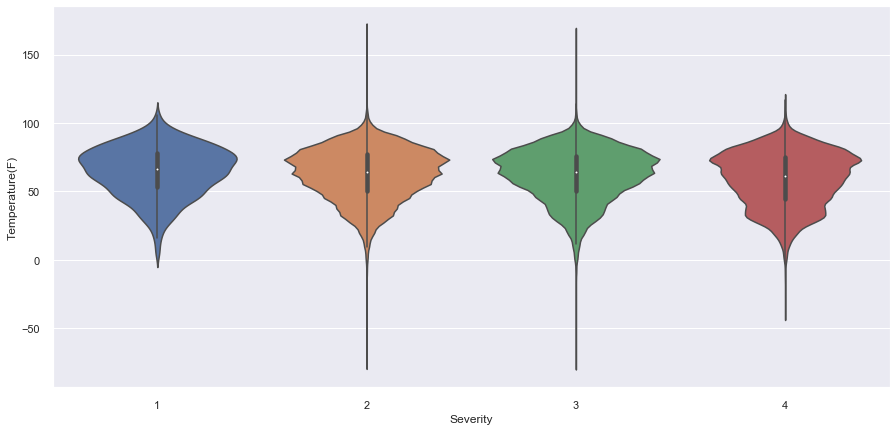

In [20]:
#plt.figure(figsize=(15,7))
#sns.violinplot(x=df['Severity'],y=df['Temperature(F)'],data=df)

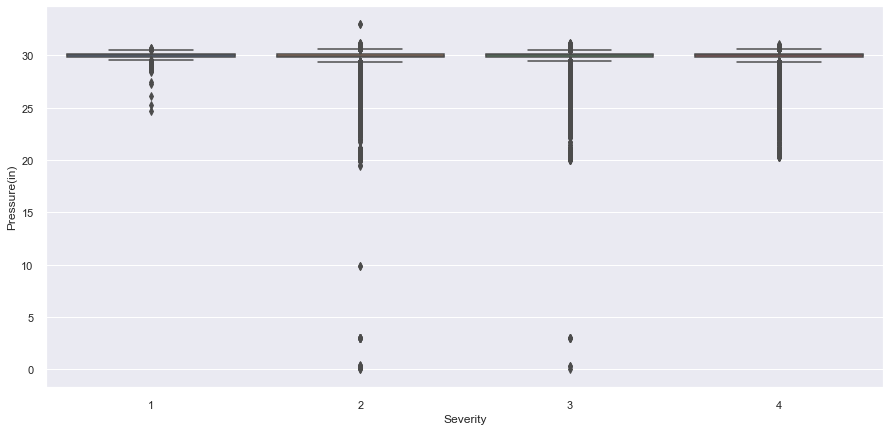

In [21]:
#plt.figure(figsize=(15,7))
#temp=df[df['Pressure(in)']>0]
#sns.boxplot(x=df['Severity'],y=df['Pressure(in)'],data=temp)

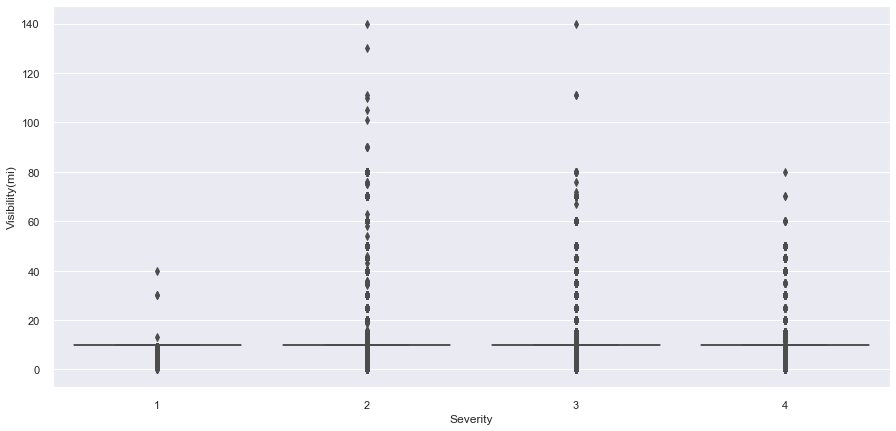

In [22]:
#plt.figure(figsize=(15,7))
#sns.boxplot(x=df['Severity'],y=df['Visibility(mi)'],data=df)

Another interesting fact to explore is location of accidents. The states below have more highly severe accidents (3-4) than less severe (1-2).

In [23]:
#state=df.groupby('State')['Severity'].agg(lambda x: x.value_counts().index[0])
#state1=state.to_frame()
#state1[state1['Severity']>2]

Severity
State          
GA            3
IA            3
MO            3
RI            3
SD            4
WY            4

## Visualizations - 15 pts

In this section we will visualize the data to determine what key insights can be determined quickly from the data. 

### Number of Accidents by State

Visualize the accident latitude and longitudes by severity. This gives us a quick indication of which severity types are most prevalent. It also provides us a visual to show how the data is clustered around states. We can see that there don't seem to be many accidents the North and South Dakota area. There seems to be a higher concerntration in the state of California and along the Eastern portion of the country.

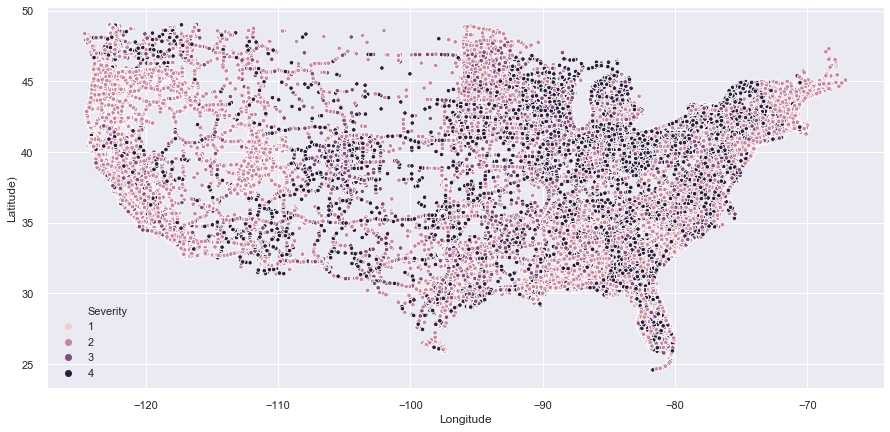

In [24]:
# Map of accidents
#plt.figure(figsize=(15,7))
#sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='Severity',s=20, legend='brief')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude)')
#plt.show()

### Number of Accidents by State

The accidents rates by state plot show that California (CA) has the highest number of accidents within the data set. The plot displays the magnititued of this difference when compared to other states. The data also indicate that two of the largest states, California and Texas, have the highest accidents rates. This makes sense as the number of accidents by states possibly correlates to the state population. At the tails of the data this correlation is high: California and Texas have the highest poopulations and the Dakota's have lower populations. Additional analysis would need to be performed to ensure the correlation was seen throughout all the data points.

The second plot drills down to look at accident severity rates by state. The same trends are seen by state. In addition we can see that the majority of accidents are classified as Severity 2 or 3 accidents. These severity levels indicate mild traffic impact. The plot also re-confirms the analysis of where most accidents occur. Except in a few cases (notabily Georgia) we see that there are more Severity 2 accidents in the states over all than Severity 3 accidents.

Text(0, 0.5, 'Number of Accidents')

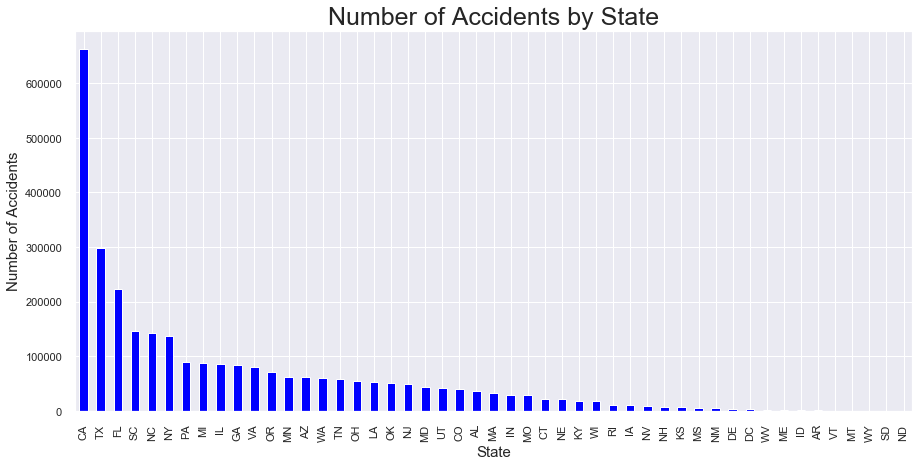

In [25]:
#plot states with accident rates. CA is highest
#plt.figure(figsize=(15,7))
#df.State.value_counts().plot(kind='bar',color='blue')
#plt.title('Number of Accidents by State',fontsize=titleFont)
#plt.xlabel('State',fontsize=axisFont)
#plt.ylabel('Number of Accidents',fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

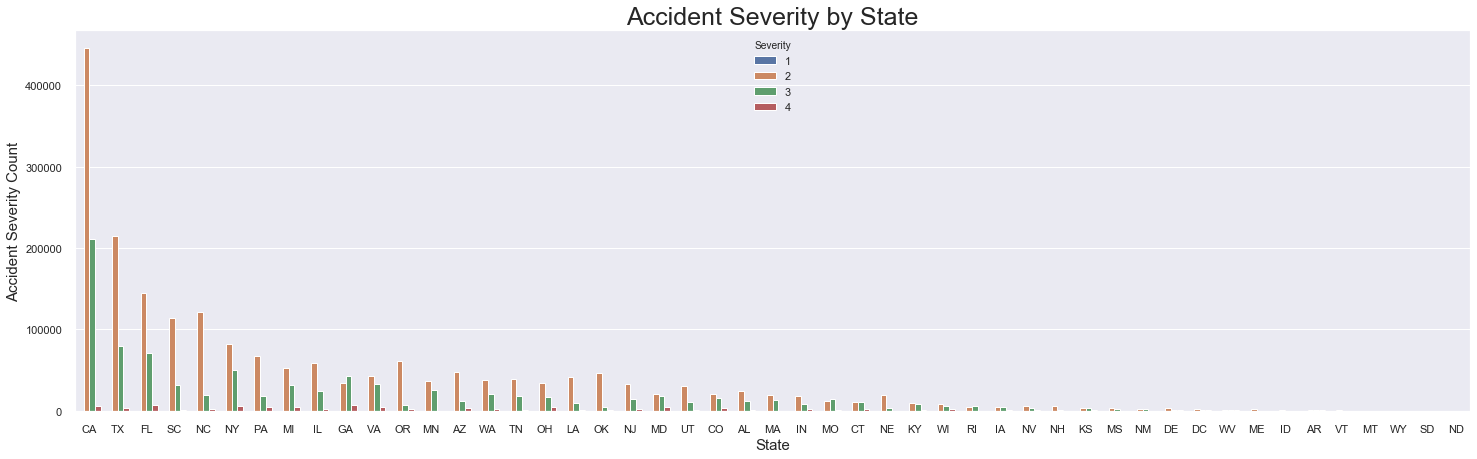

In [26]:
#Plot accidents based on severity categorizations. Sev 2/3 most prevalent in each state.
#Should look further
#plt.figure(figsize=(25,7))
#sns.countplot(df.State,hue=df.Severity,order = df.State.value_counts().index)
#plt.title('Accident Severity by State', fontsize=titleFont)
#plt.xlabel('State', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Frequency of Accident Occurrence by Month

Viewing accident occurrence by month we see that the occurrence of accidents seems to increase over the year. The fourth quarter of the year (October, November, December) have the highest accident occurrences. Factors that could influence this could be the higher number of individuals travelling due to the holidays, higher number of people driving due to vacations, or even higher fatigue due to it being later in the year. These possibilities should be further investigated to see if any additional insight is gleemed.

The second plot reaffirms the trends seen in the first plot and also shows the same trends being seen with the Severity 2 accidents. These accidents are still the most prevalent type. This trend does seem to hold for Severity 3 accidents. Severity 4 accidents seem to remain consistent across the months.

Text(0, 0.5, 'Number of Accidents')

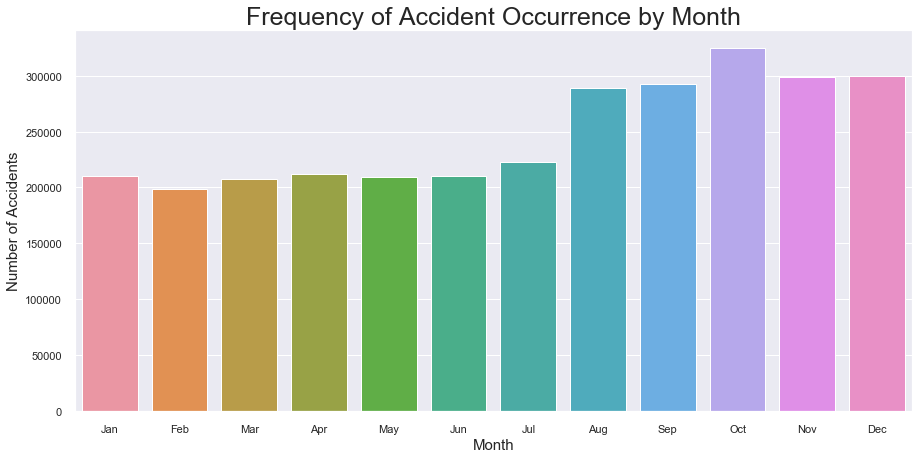

In [27]:
#Plot when most accidents occur. Most occur between 7-9 AM
#plt.figure(figsize=(15,7))
#sns.countplot(df.Start_Month, order=Month_Sorted_Month(df.Start_Month))
#plt.title('Frequency of Accident Occurrence by Month',fontsize=titleFont)
#plt.xlabel('Month',fontsize=axisFont)
#plt.ylabel('Number of Accidents', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

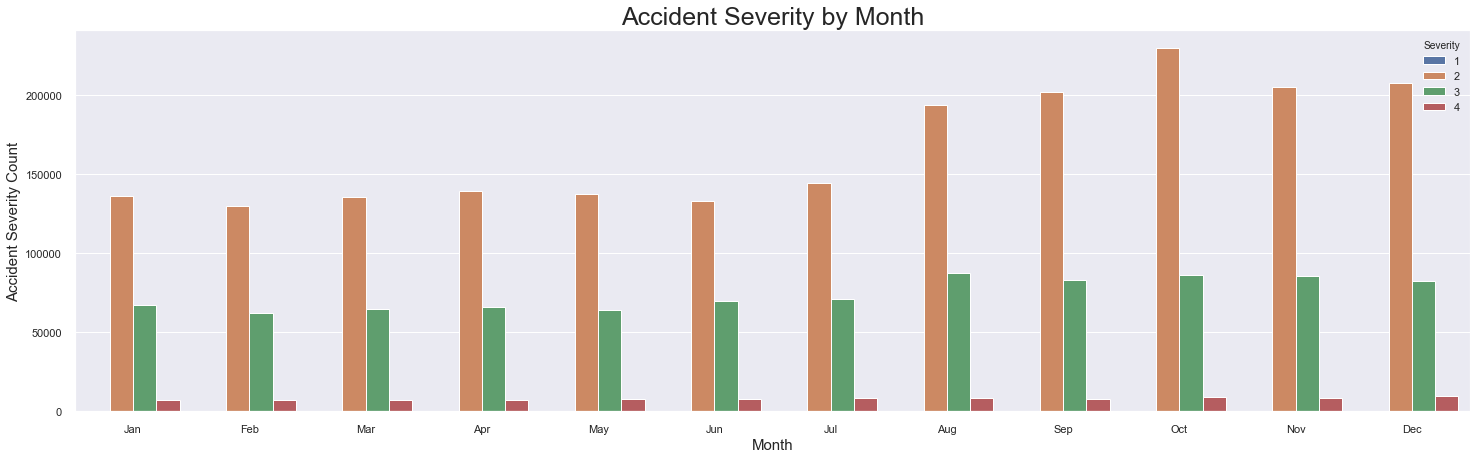

In [28]:
#Plot accidents based on severity categorizations. Sev 2/3 most prevalent in each Month.
#plt.figure(figsize=(25,7))
#sns.countplot(df.Start_Month,hue=df.Severity,order=Month_Sorted_Month(df.Start_Month))
#plt.title('Accident Severity by Month', fontsize=titleFont)
#plt.xlabel('Month', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Frequency of Accident Occurrence by Day

Viewing accident occurrence by day we see that fewer accidents occur on the weekend than during weekdays. We also see a higher occurrence of accidents on Tuesday and Friday when compared to other days of the week.

The second plot shows the same trends when broken down by accident severity. Severity 2 accidents continue to follow the larger trends specified above. Severity 3 accidents occur more on Fridays and Tuesdays, as with Severity 2 incidents. More interesting is that the differential between Severity 2 and 3 accidents decreases on the weekend. The number of Severity 2 and 3 accidents that occur on the weekend are very close. Severity 4 accidents drop on the weekends, but look to remain consistent during the week.

Text(0, 0.5, 'Number of Accidents')

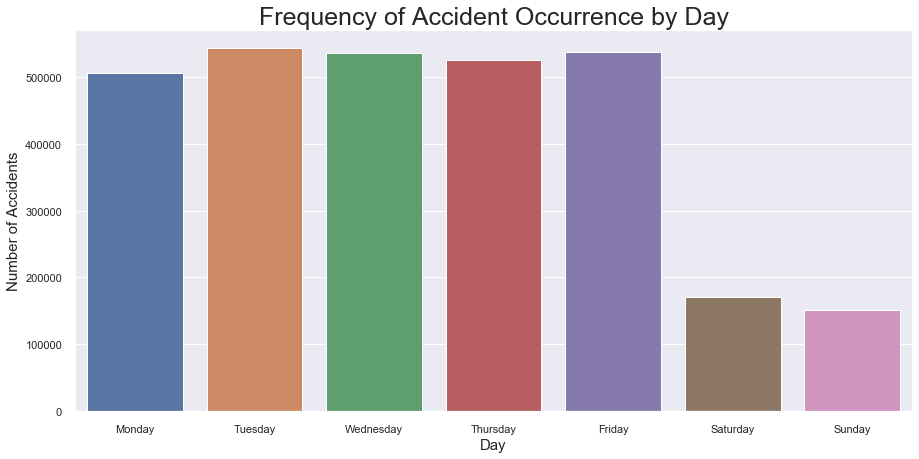

In [29]:
#Plot when most accidents occur. Most occur between 7-9 AM
#plt.figure(figsize=(15,7))
#sns.countplot(pd.to_datetime(df.Start_Time).dt.day_name())
#plt.title('Frequency of Accident Occurrence by Day',fontsize=titleFont)
#plt.xlabel('Day',fontsize=axisFont)
#plt.ylabel('Number of Accidents', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

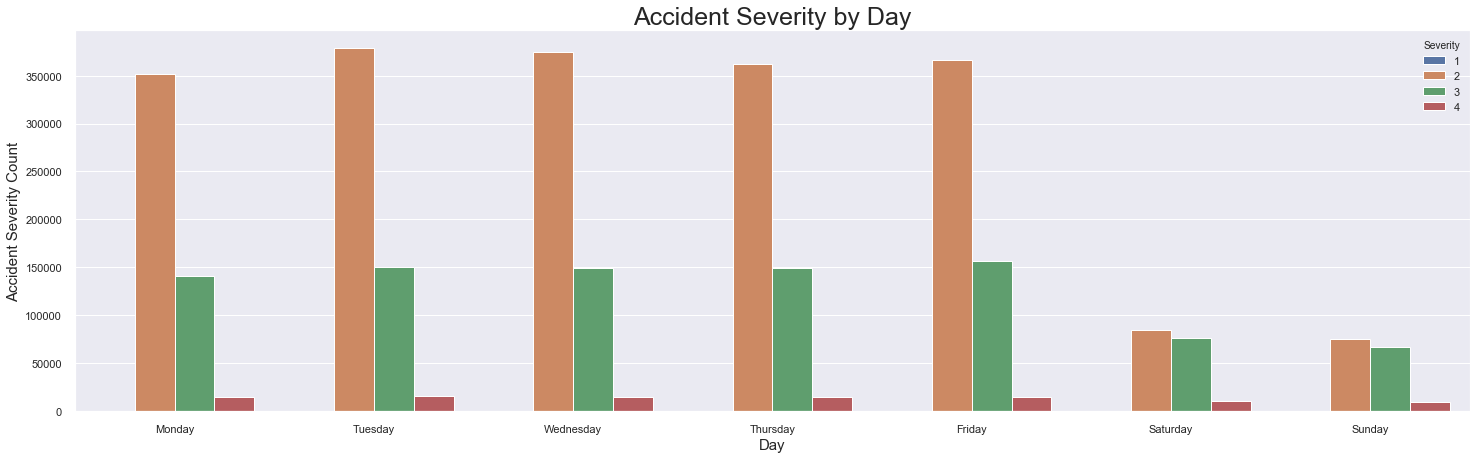

In [30]:
#Plot accidents based on severity categorizations. Sev 2/3 most prevalent in each Month.
#plt.figure(figsize=(25,7))
#sns.countplot(pd.to_datetime(df.Start_Time).dt.day_name(),hue=df.Severity)
#plt.title('Accident Severity by Day', fontsize=titleFont)
#plt.xlabel('Day', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Frequency of Accident Occurrence by Hour of Day

Accident rates by hour of the day show that the most accidents occur between the rush hour periods (7-9AM and 4-7PM respectively). Based on the data most accidents tend to occur during the morning rush hour period. The data also show that during the late evening and early morning hours accidents occur less frequently. 

The second plot below shows the accident severity by hour of the day. This reaffirms the trend seen in the previous chart with most accidents occuring during rush hour. Furthermore we can see that most of the accidents that occur are of Severity 2, thus reinforming the trend that the majority of accidents are not severe. 

Text(0, 0.5, 'Number of Accidents')

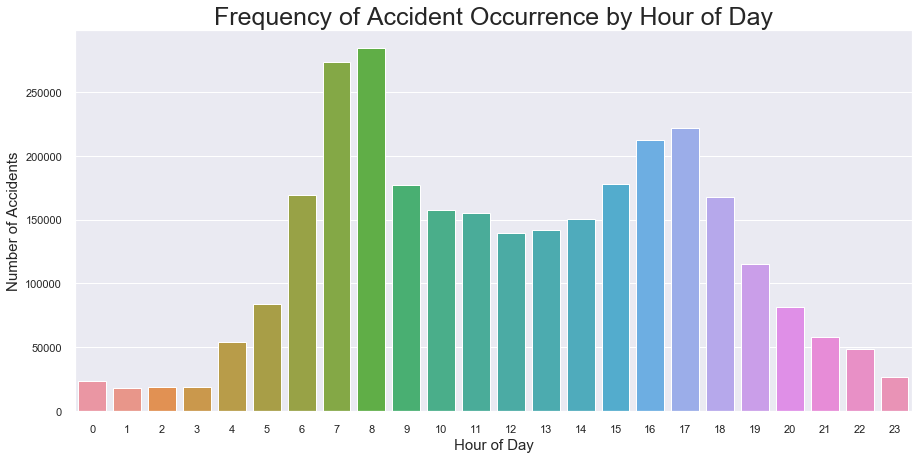

In [31]:
#Plot when most accidents occur. Most occur between 7-9 AM
#plt.figure(figsize=(15,7))
#sns.countplot(df.Start_Hour)
#plt.title('Frequency of Accident Occurrence by Hour of Day',fontsize=titleFont)
#plt.xlabel('Hour of Day',fontsize=axisFont)
#plt.ylabel('Number of Accidents', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

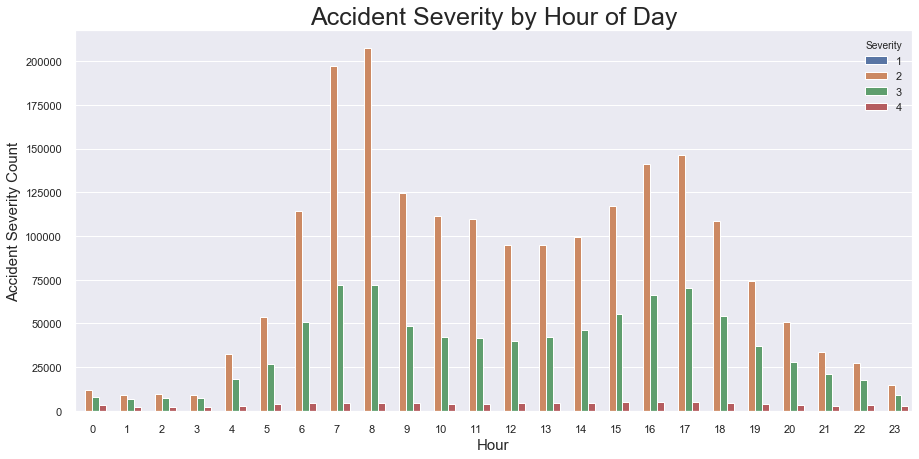

In [32]:
#Plot accidents based on severity categorizations. Sev 2/3 most prevalent in each hour.
#Should look further
#plt.figure(figsize=(15,7))
#sns.countplot(df.Start_Hour,hue=df.Severity)
#plt.title('Accident Severity by Hour of Day', fontsize=titleFont)
#plt.xlabel('Hour', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Weather Conditions for Accidents

The first plot below shows the top 5 weather conditions that were recorded at the time of an accident. From the plot we see that most accidents occur when weather conditions are clear. This seems intuitive in that drivers may be more cautious while driving in poor weather conditions.

The second plot below is a re-affirmation that Severity levels 1 and 2 are the most prevalent accident types and that the majority of these accidents occur during clear weather conditions. This plot does indicate there are more severity 4 accidents on clear days than with other types of weather. This is the first time this pattern of Severity 4 accidents has shown.

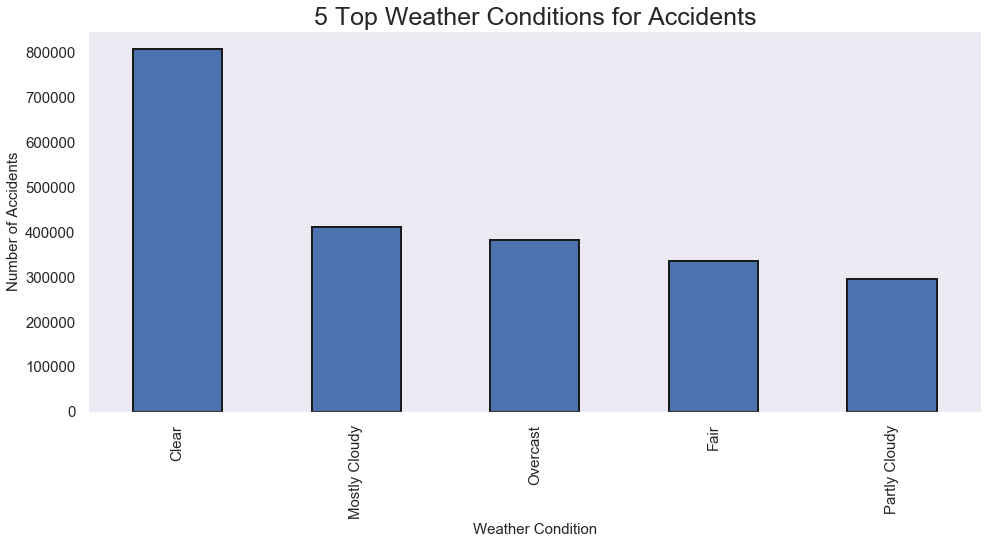

In [33]:
#Plot top weather conditions for accidents. Most accidents occur on clear days
#fig, ax=plt.subplots(figsize=(16,7))
#df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
#plt.xlabel('Weather Condition',fontsize=axisFont)
#plt.ylabel('Number of Accidents',fontsize=axisFont)
#ax.tick_params(labelsize=labelFont)
#plt.title('5 Top Weather Conditions for Accidents',fontsize=titleFont)
#plt.grid()
#plt.ioff()

### Weather Conditions for Accidents

Layering in the severity by weather condition, we can start to see that certain weather conditions do have a higher prevelance of both accidents and severe accidents. Overcast and clear, for example, tend to have the highest rates of the most severe accidents. Could this be a function of potentially higher driving activity occurring during these conditions? Possibly. We will explore this in later analysis.

Text(0, 0.5, 'Weather Condition')

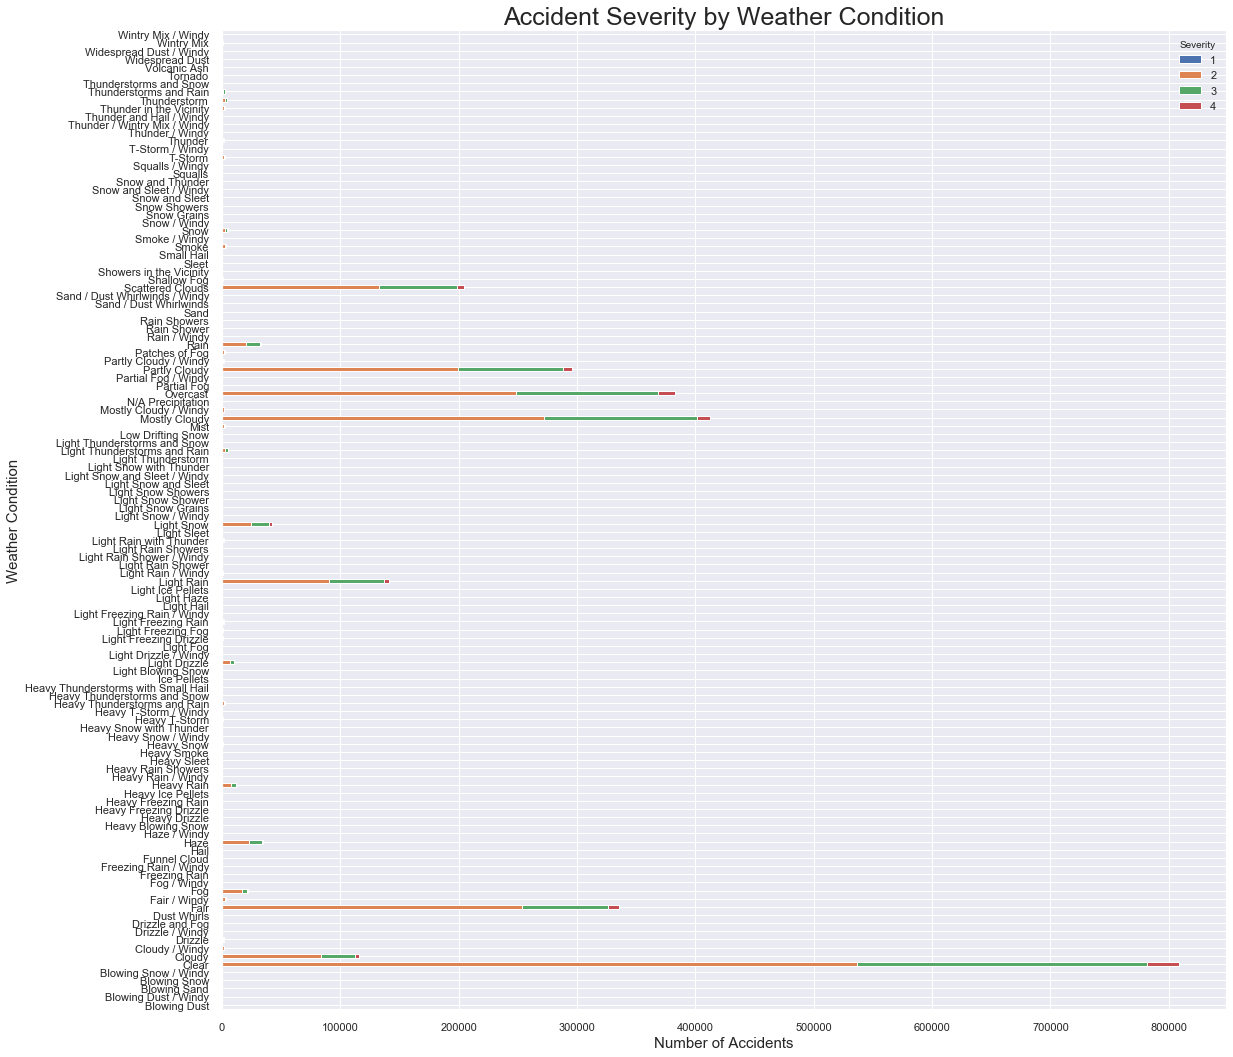

In [34]:
#display(HTML("<style>div.output_scroll { height: 65em; }</style>"))
#plt.rcParams['figure.figsize'] = [18, 18]

# State and severity bar chart
#df_bar = pd.crosstab(index=df['Weather_Condition'], columns=df['Severity'])

#df_bar.plot(kind='barh', stacked=True)
#plt.title('Accident Severity by Weather Condition', fontsize=titleFont)
#plt.xlabel('Number of Accidents', fontsize=axisFont)
#plt.ylabel('Weather Condition', fontsize=axisFont)

### Time to Clear Accidents

The plot below shows the time it takes to clear an accident and get traffic fully flowing again. As shown in the plot, it frequently only takes one hour for accidents to be cleared before traffic is flowing. 

Text(0, 0.5, 'Number of Accidents')

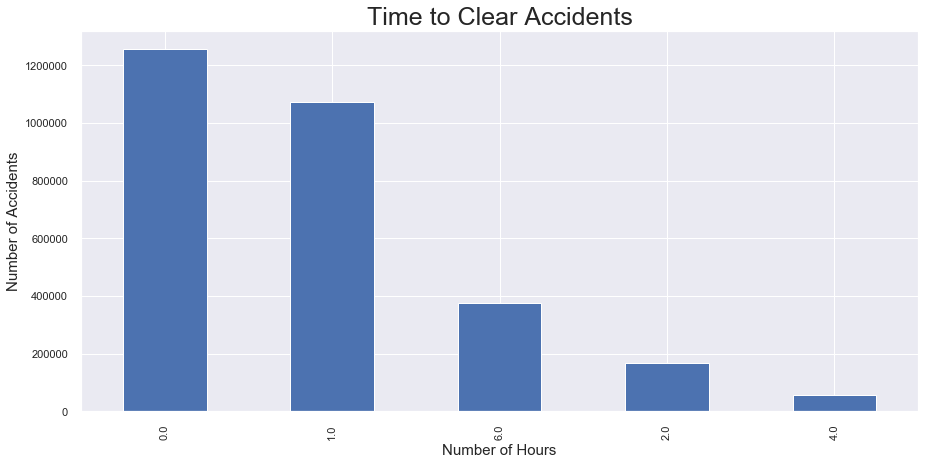

In [35]:
#plot length it takes to clear an accident. Looks like about 1 hour most frequently
#plt.figure(figsize=(15,7))
#round((df['Time_Duration(min)']/60),0).value_counts().head().plot(kind='bar',color='b')
#plt.title('Time to Clear Accidents',fontsize=titleFont)
#plt.xlabel('Number of Hours',fontsize=axisFont)
#plt.ylabel('Number of Accidents', fontsize=axisFont)

### Accident Severity by Accident Closeness to Traffic Object

In this section we'll look at the accident severity as it relates to the proximity of a traffic object. Traffic objects are items such as speed bumps, traffic lights, yields, etc. These are the majority of the boolean values defined in the data. 

From the charts can see the following observations:

- Accidents do not seem to occur near bumps, yields, traffic calming areas, or areas with no exits
- Accidents seem to occur most near crossings and traffic signals
- The occurrences of accidents at other points are extremely small
- All of the traffic object data shows the prevalence of Severity 2 accidents continuing to reaffirm that these are the most frequent



Text(0, 0.5, 'Accident Severity Count')

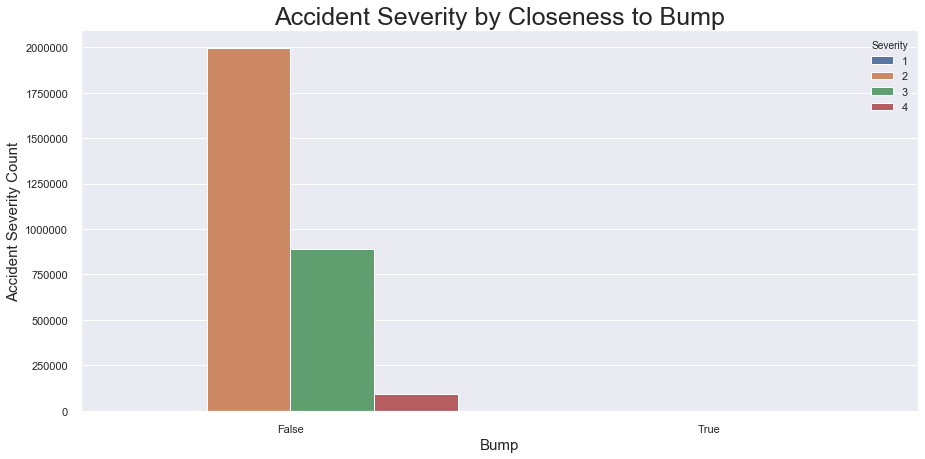

In [36]:
#plot the accident severity near a bump
#plt.figure(figsize=(15,7))
#sns.countplot(df.Bump,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Bump', fontsize=titleFont)
#plt.xlabel('Bump', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

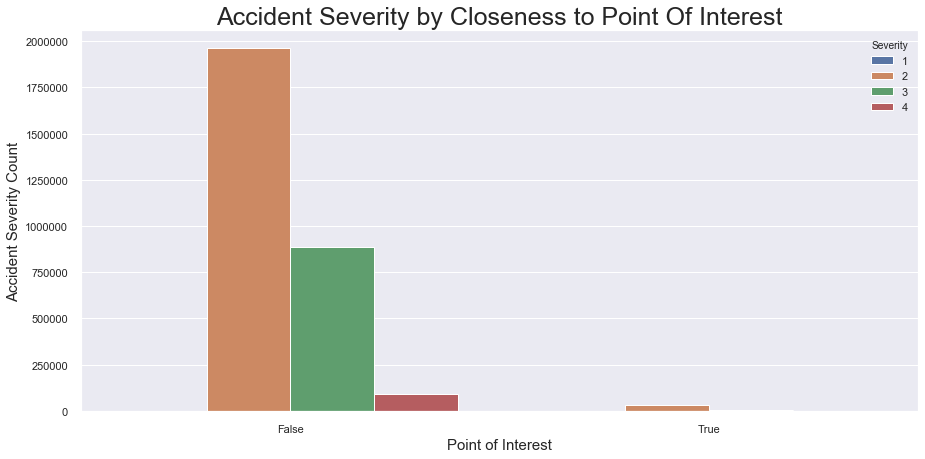

In [37]:
#plot the accident severity near a Point of Interest
#plt.figure(figsize=(15,7))
#sns.countplot(df.PointOfInterest,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Point Of Interest', fontsize=titleFont)
#plt.xlabel('Point of Interest', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

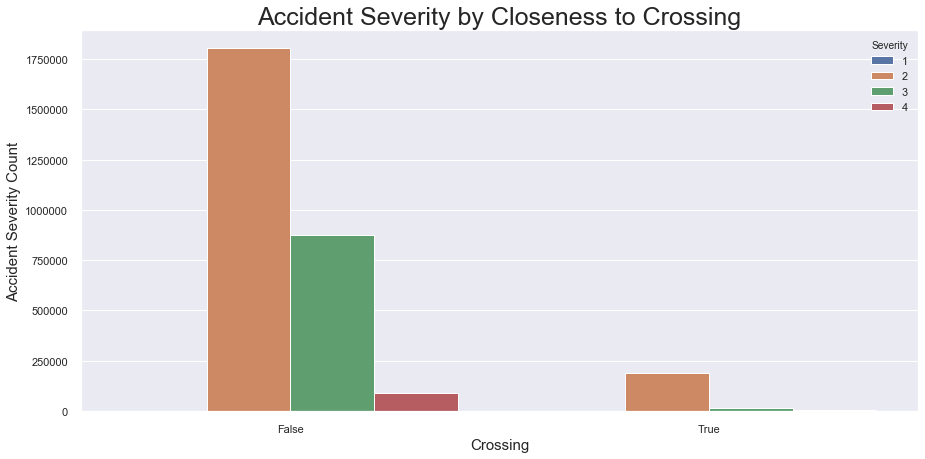

In [38]:
#plot the accident severity near a Crossing
#plt.figure(figsize=(15,7))
#sns.countplot(df.Crossing,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Crossing', fontsize=titleFont)
#plt.xlabel('Crossing', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

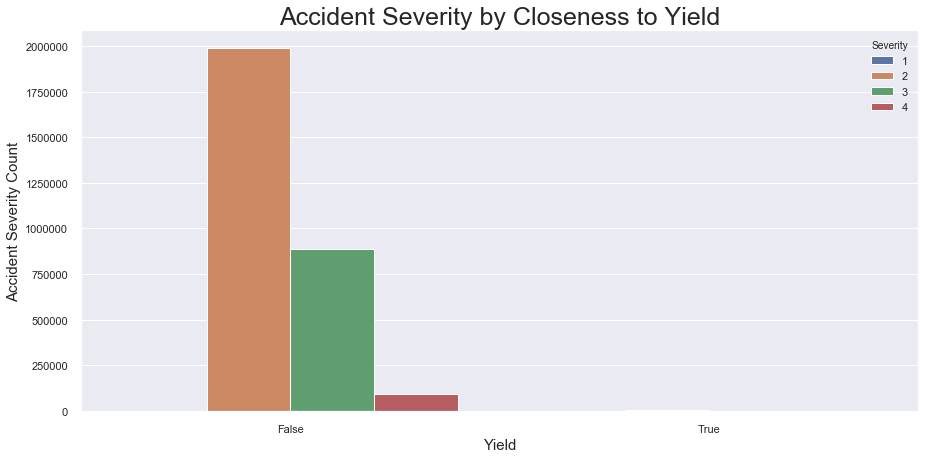

In [39]:
#plot the accident severity near a Point of Yield
#plt.figure(figsize=(15,7))
#sns.countplot(df.Yield,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Yield', fontsize=titleFont)
#plt.xlabel('Yield', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

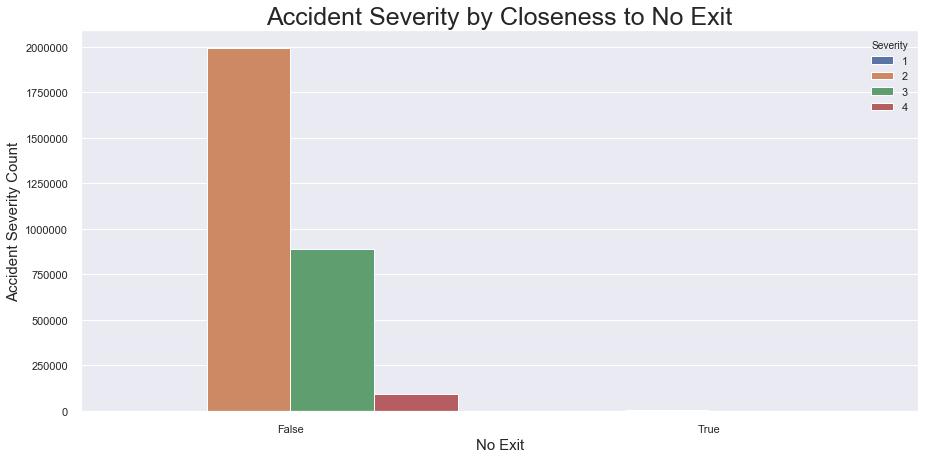

In [40]:
#plot the accident severity near no exit
#plt.figure(figsize=(15,7))
#sns.countplot(df.No_Exit,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to No Exit', fontsize=titleFont)
#plt.xlabel('No Exit', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Railway')

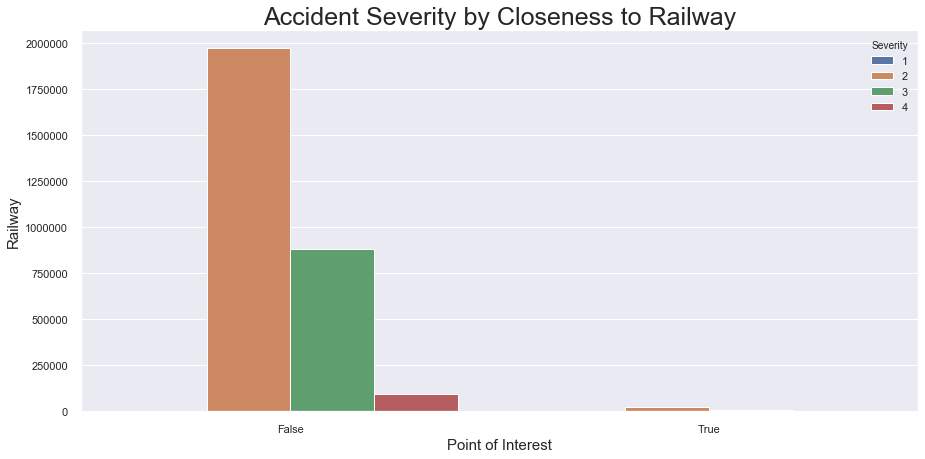

In [41]:
#plot the accident severity near a Railway
#plt.figure(figsize=(15,7))
#sns.countplot(df.Railway,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Railway', fontsize=titleFont)
#plt.xlabel('Point of Interest', fontsize=axisFont)
#plt.ylabel('Railway', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

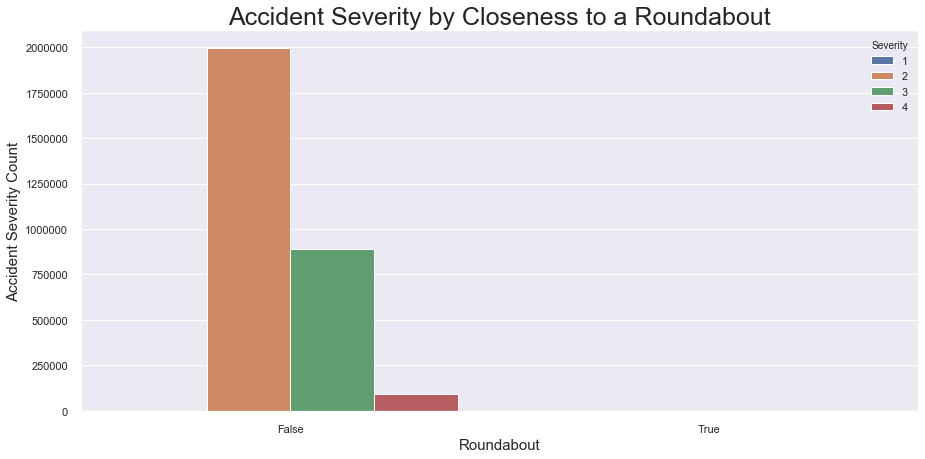

In [42]:
#plot the accident severity near a Roundabout
#plt.figure(figsize=(15,7))
#sns.countplot(df.Roundabout,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to a Roundabout', fontsize=titleFont)
#plt.xlabel('Roundabout', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

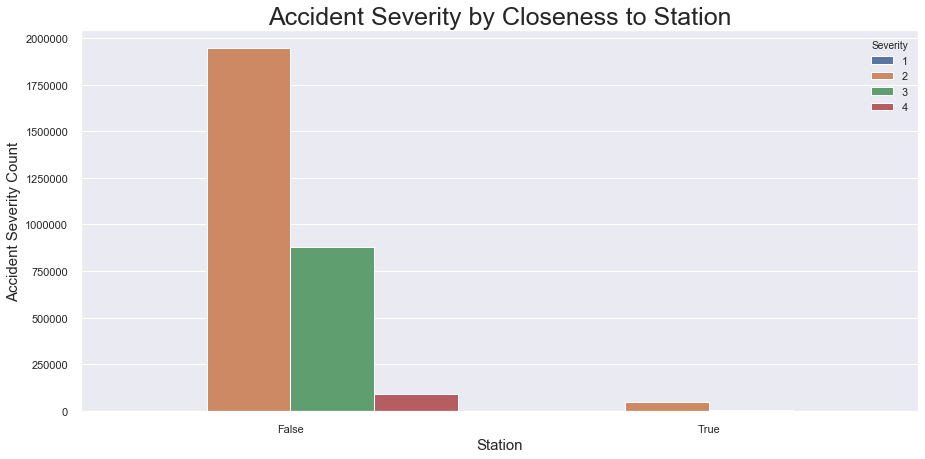

In [43]:
#plot the accident severity near a Station
#plt.figure(figsize=(15,7))
#sns.countplot(df.Station,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Station', fontsize=titleFont)
#plt.xlabel('Station', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

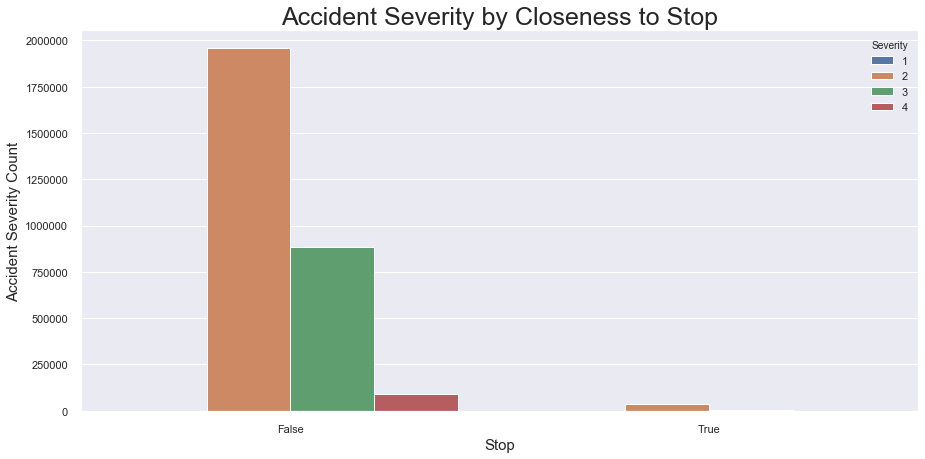

In [44]:
#plot the accident severity near a Station
#plt.figure(figsize=(15,7))
#sns.countplot(df.Stop,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Stop', fontsize=titleFont)
#plt.xlabel('Stop', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

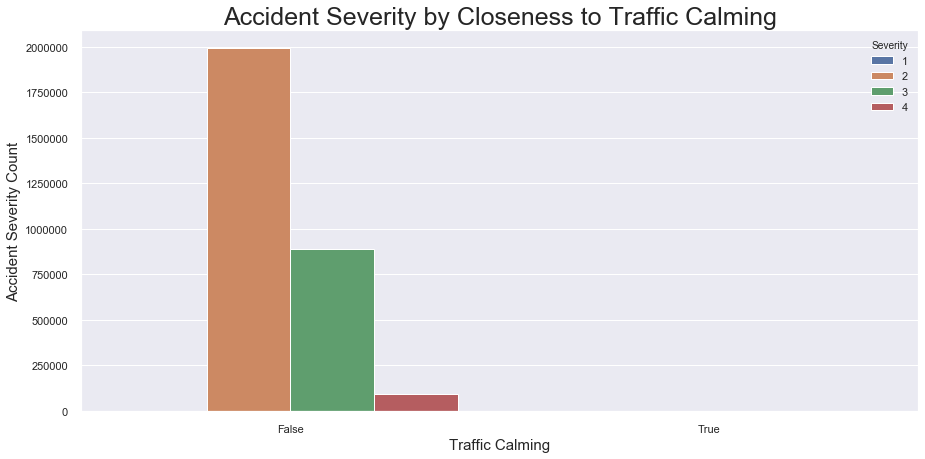

In [45]:
#plot the accident severity near a Traffic_Calming
#plt.figure(figsize=(15,7))
#sns.countplot(df.Traffic_Calming,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Traffic Calming', fontsize=titleFont)
#plt.xlabel('Traffic Calming', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

In [46]:
#plot the accident severity near a Traffic Signal
#plt.figure(figsize=(15,7))
#sns.countplot(df.Traffic_Signal,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Traffic Signal', fontsize=titleFont)
#plt.xlabel('Traffic Signal', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

Text(0, 0.5, 'Accident Severity Count')

Text(0, 0.5, 'Accident Severity Count')

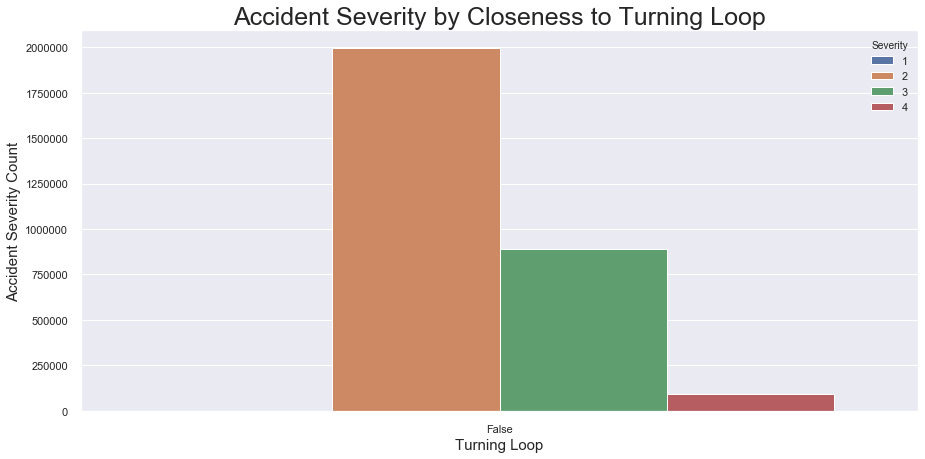

In [47]:
#plot the accident severity near a Turning Loop
#plt.figure(figsize=(15,7))
#sns.countplot(df.Turning_Loop,hue=df['Severity'])
#plt.title('Accident Severity by Closeness to Turning Loop', fontsize=titleFont)
#plt.xlabel('Turning Loop', fontsize=axisFont)
#plt.ylabel('Accident Severity Count', fontsize=axisFont)

### Additional Visualizations

For additional visualizations of the data the team also built a Power BI dashboard. This dashboard allows the user to gain some interactivity with the data to look for specific trends that they may want to focus on. For example, number of accidents in Texas.

The dashboard is embedded below for interactivity within the notebook and can be accessed at: https://app.powerbi.com/view?r=eyJrIjoiZWE4NjllMWEtZTA5YS00MGY0LWIxYzEtNzFjYWE0NGUwNjFkIiwidCI6IjFlZmEzZTljLTY1ZWItNGM5Ny05ZjZiLTQxNWViZGYwOTI1OCIsImMiOjN9

For the embedded version it is best executed in full screen mode to provide the user with more interactivity.

In [1]:
#%%html
#<iframe width="800" height="600" src="https://app.powerbi.com/view?r=eyJrIjoiZWE4NjllMWEtZTA5YS00MGY0LWIxYzEtNzFjYWE0NGUwNjFkIiwidCI6IjFlZmEzZTljLTY1ZWItNGM5Ny05ZjZiLTQxNWViZGYwOTI1OCIsImMiOjN9" frameborder="0" allowFullScreen="true"></iframe>

## Attribute Relationships - 15 pts

The following section looks at attribute relationships that could be beneficial in model development.

### Distance versus Temperature:

Most of the observed accidents occur when distances are relatively low (0-50 miles) and temperature is within the range of 0 to 100 degrees Farenheit. It goes without saying that this temperature range is 1) very wide, and 2) encompasses the "normal" range of temperatures within the U.S. 

Interestingly, we do observe a slightly higher incidence of the most severe accidents within the range of 0 to approximately 40 degrees, possibly attributable to freezing conditions such as ice and/or snow. It will be interesting to correlate this finding alongside our weather description field to see if we observe higher severe accidents when these conditions are present. 

Additionally if we look at the distance axis with the most severe accidents in mind, a pattern starts to emerge that the most severe accidents generally occur under 50 miles distance.

In [49]:
#Scatter plot - Temp vs. Distance

#plt.title('Distance vs. Temperature Scatterplot')
#sns.scatterplot(x='Temperature(F)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

### Distance versus Visibility:

When visibility is lowest, we see larger distances driven and a higher frequency of accidents. It follows that the reduced visibility then may be partly to blame for the higher accident rate we've observed. The severity of these accidents are also a mixed bag - from least severe to most severe.

Conversely, when visibility increases, we see distances decrease. We also see less severe accidents occuring, save for a handful of severity level 3 accidents around the 110 mile mark. Higher visibility then appears to have some correlation with a lower accident rate.

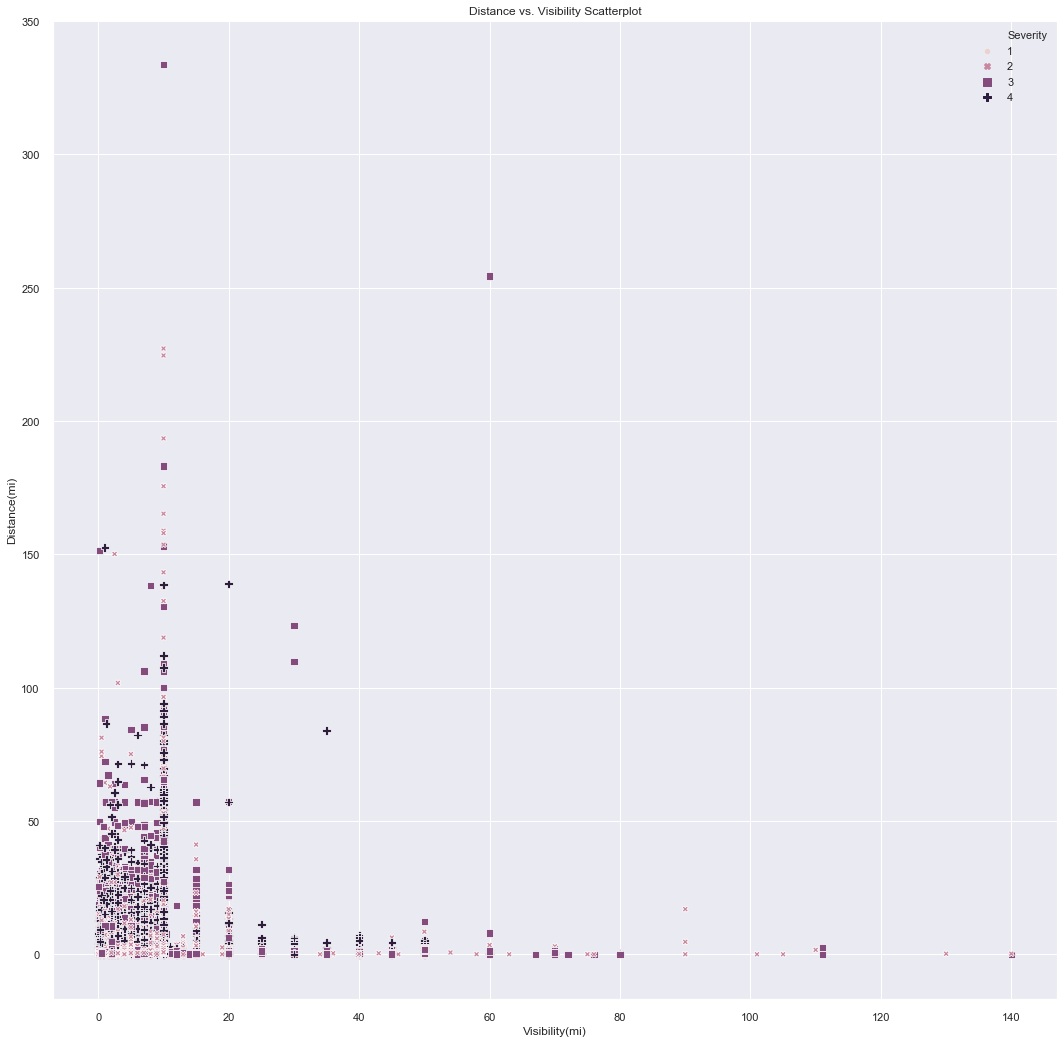

In [50]:
# Scatter plot - Visibility vs. Temperature

#plt.title('Distance vs. Visibility Scatterplot')
#sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

### Visibility vs. Temperature:

As with our previous observations, most accidents tend to occur when lower visibility conditions are present. As visibility conditions improve, both the accident rate and severity of those accidents appears to also improve. 

If we layer temperature into the plot alongside visibility, there does not appear to be a clear impact temperature has alongside visibility with respect to accident rate or severity.

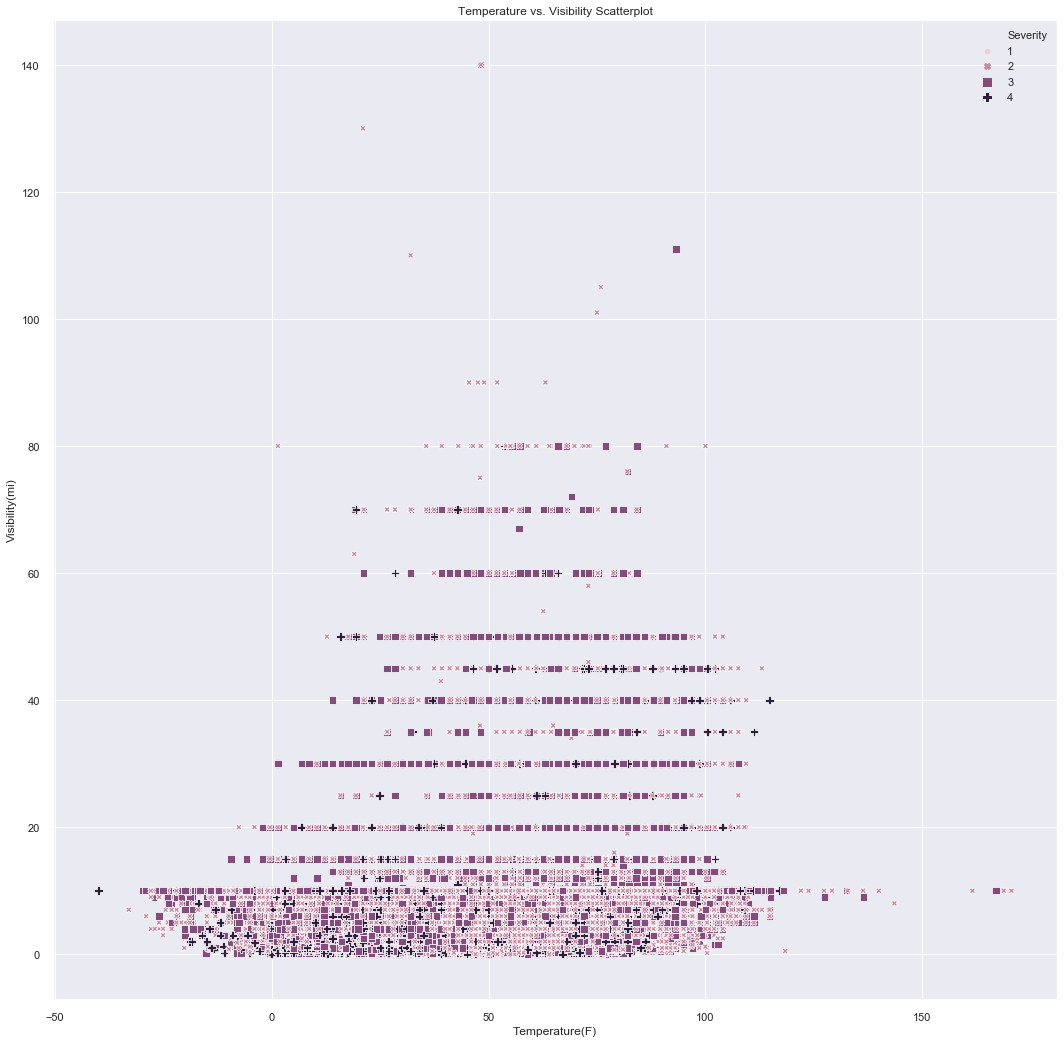

In [51]:
#Scatter plot - Temperature vs. Visibility

#plt.title('Temperature vs. Visibility Scatterplot')
#sns.scatterplot(x='Temperature(F)', y='Visibility(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Precipitation versus Visibility

Most accidents appear to cluster between 0 and 5 inches of precipitation and lower levels of visibility. 

As we saw in previous scatterplots, as visibility increases, the accident rate tends to decrease. As precipitation increases however, accident frequency also increases but to a point (approximately at 5 inches of precipitation - and again around 10 inches). There appears to be a gap between 5 and 10 inches of precipitation at lower visibility levels. There is also a clustering of accidents right around the 10 inch precipitation mark with lower visibility associated as well. 

As with our previous visibility scatterplot, the most severe accidents appear to occur at lower levels of visibility 

In [52]:
#Scatter plot - Precipitation vs. Visibility

#plt.title('Precipitation(in) vs. Visibility Scatterplot')
#sns.scatterplot(x='Precipitation(in)', y='Visibility(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Precipitation versus Distance

As precipitation increases, distance does not appear to follow. In fact, most accidents tend to occur within relatively small distances and low precipitation, save for one cluster of accidents that occur when precipitation reaches 10 inches - with distance still remaining relatively low. 

At lower levels of precipitation however, we observe crashes occuring at longer distances - likely attributable to more driving activity when conditions are better. The most severe accidents tend to occur within 50 miles and with 0 - 4 inches of precipitation.

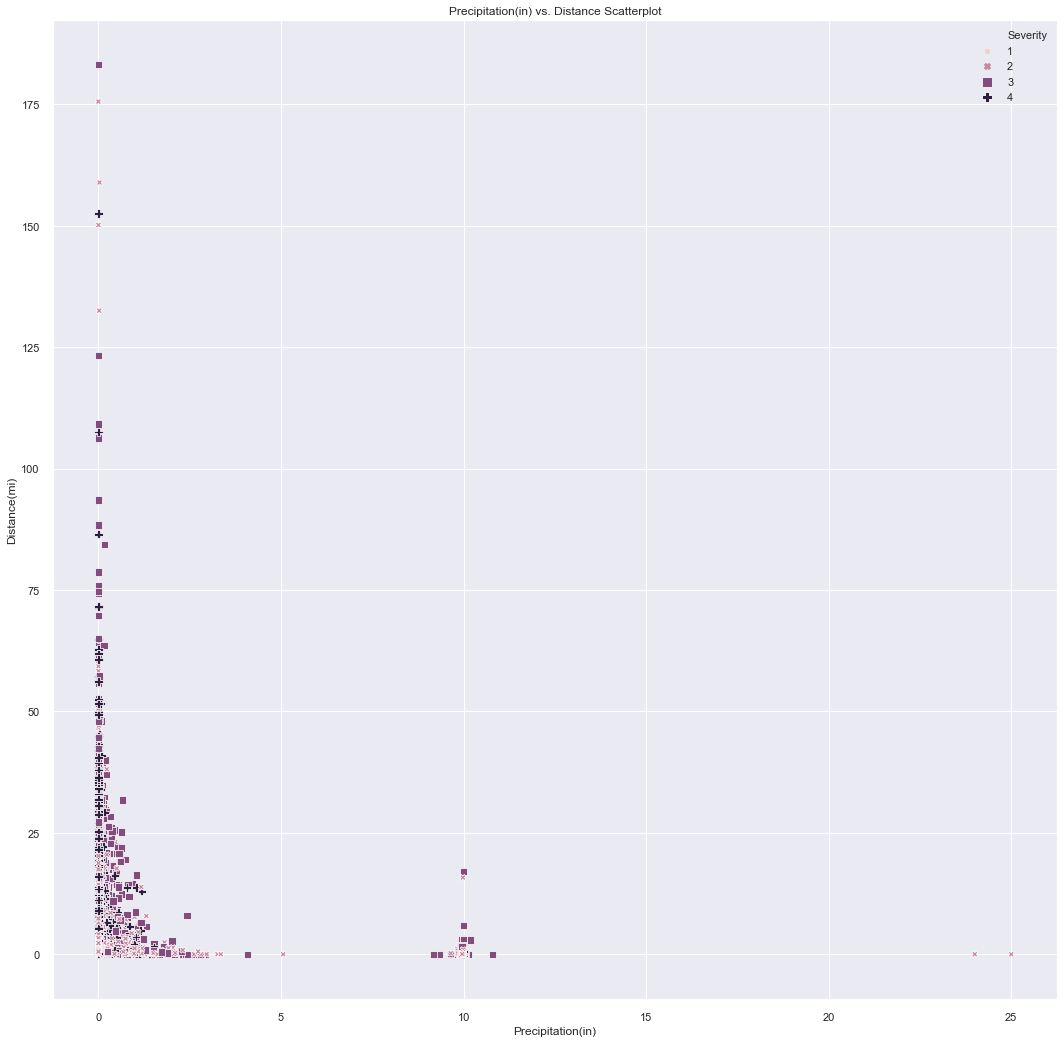

In [53]:
#Scatter plot - Precipitation vs. Distance

#plt.title('Precipitation(in) vs. Distance Scatterplot')
#sns.scatterplot(x='Precipitation(in)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Visibility versus Distance

As visibility increases, distance driven does as well - to a point. At around the 15 miles of visibility marker, distance driven tends to decrease. What we may be seeing here is that visibility past a certain point - say 15-20 miles, makes no difference to the everyday driver in terms of the distance they cover as either of those conditions present excellent driving conditions. 

What is interesting is the 0-15 mile visibility range; we see accidents steadily increase as we approach the 15 mile visibility mark. This increase parallels the distance increase as well - potentially indicating that as visibility conditions improve up to around 15 miles of visibility, so too does the distance driven and the associated increase in accidents.

In [54]:
#Scatter plot - Visibility vs. Distance

#plt.title('Visibility(mi) vs. Distance Scatterplot')
#sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Pressure versus Distance

When pressure is highest, driving distance seems to also be highest - potentially indicating that folks drive further when higher pressure systems exist (usually resulting in clearer driving weather). 

We also see a clustering of accidents on the lower side of the pressure range with a lower distance as well - indicating potentially that when pressure is low (as it usually is in storm conditions), people generally drive less. Whatsmore, there appears to be a clustering of more severe accidents in this space potentially due to weather.

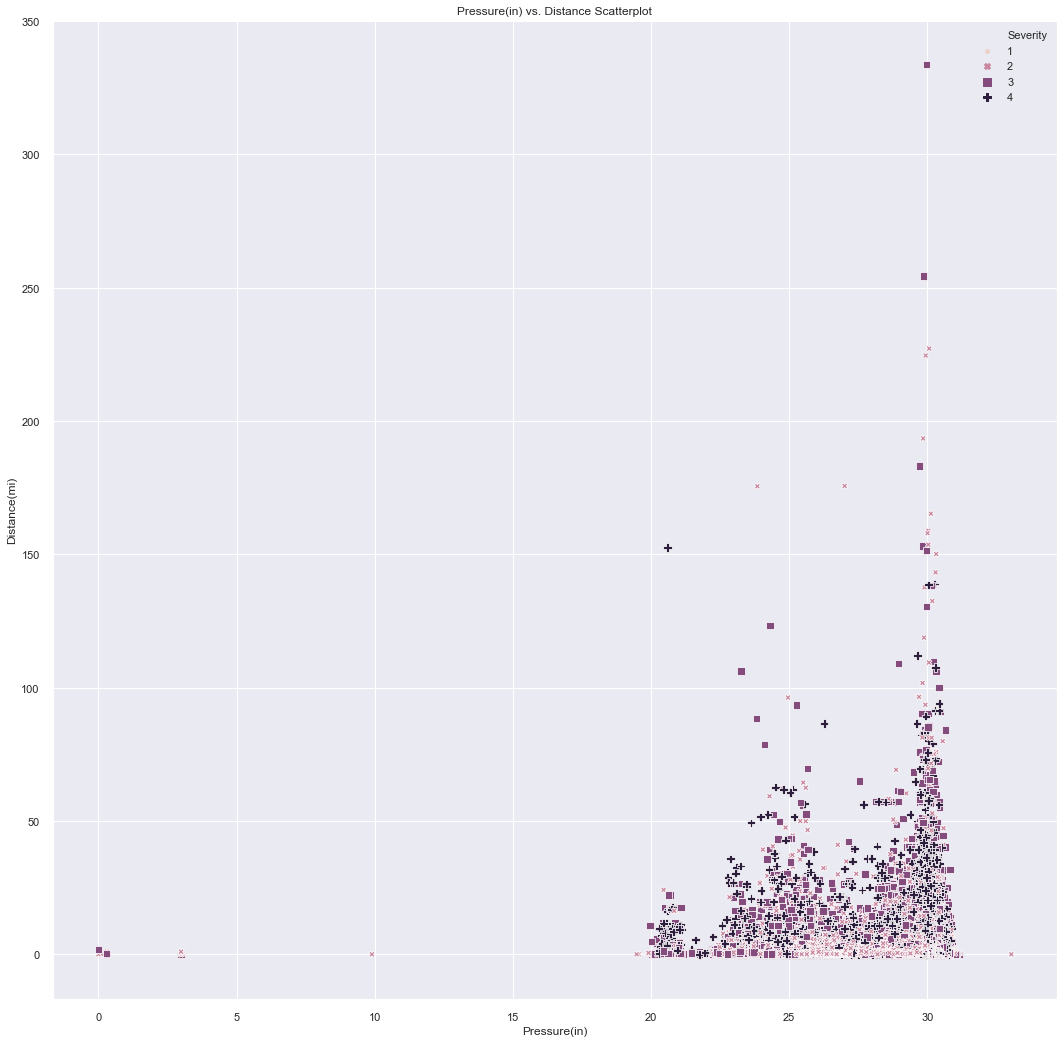

In [55]:
#Scatter plot - Pressure vs. Distance

#plt.title('Pressure(in) vs. Distance Scatterplot')
#sns.scatterplot(x='Pressure(in)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Humidity vs. Distance

There doesn't appear to be any strong correlation or insight from the combination of humidity, distance, and accident severity.

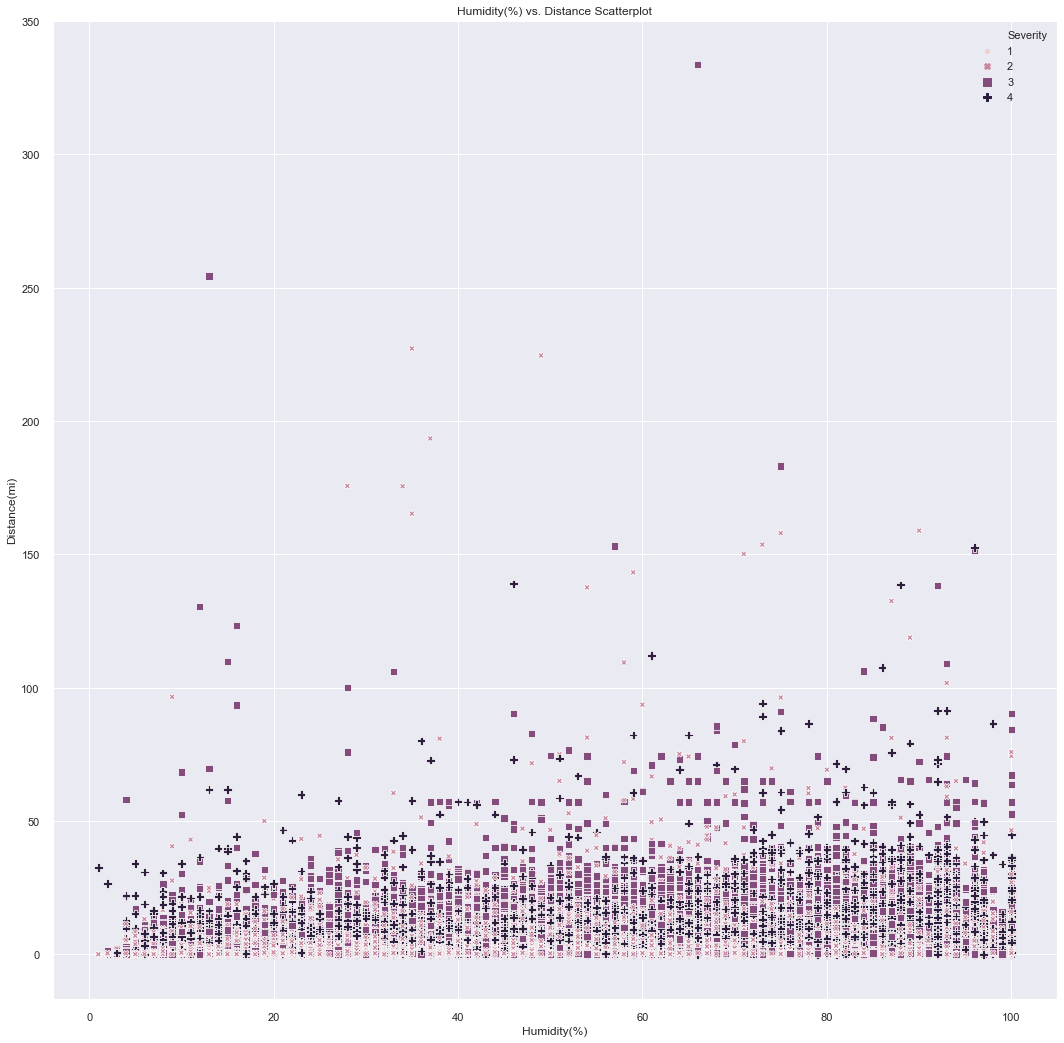

In [56]:
#Scatter plot - Humidity vs. Distance

#plt.title('Humidity(%) vs. Distance Scatterplot')
#sns.scatterplot(x='Humidity(%)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Humidity vs. Temperature

There's a clear association between rising temperature and falling humidity; said another way, as humidity increases temperature seems to decrease which possibly indicates the relationship between higher temperature and lower humidity. This is likely more of a weather-related effect / relationship than any specific finding with the accident data. 

In [57]:
#Scatter plot - Humidity(%) vs. Temperature(F)

#plt.title('Humidity(%) vs. Temperature(F)')
#sns.scatterplot(x='Humidity(%)', y='Temperature(F)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Pressure vs. Temperature

We observe a larger range of accidents across temperature when pressure hovers around 30 inches. Higher pressure typically indicates clearer skies, so this could just be an indication that folks drive more when the weather is clearer, regardless of temperature - perhaps they can see better. 

Interestingly, we see a clustering of accidents on the lower end of pressure as well (around 0-5 in) at the ~40 to 80 degree (temperature) range. These could be possibly attributable to stormier conditions as low pressure generally induces storms. 

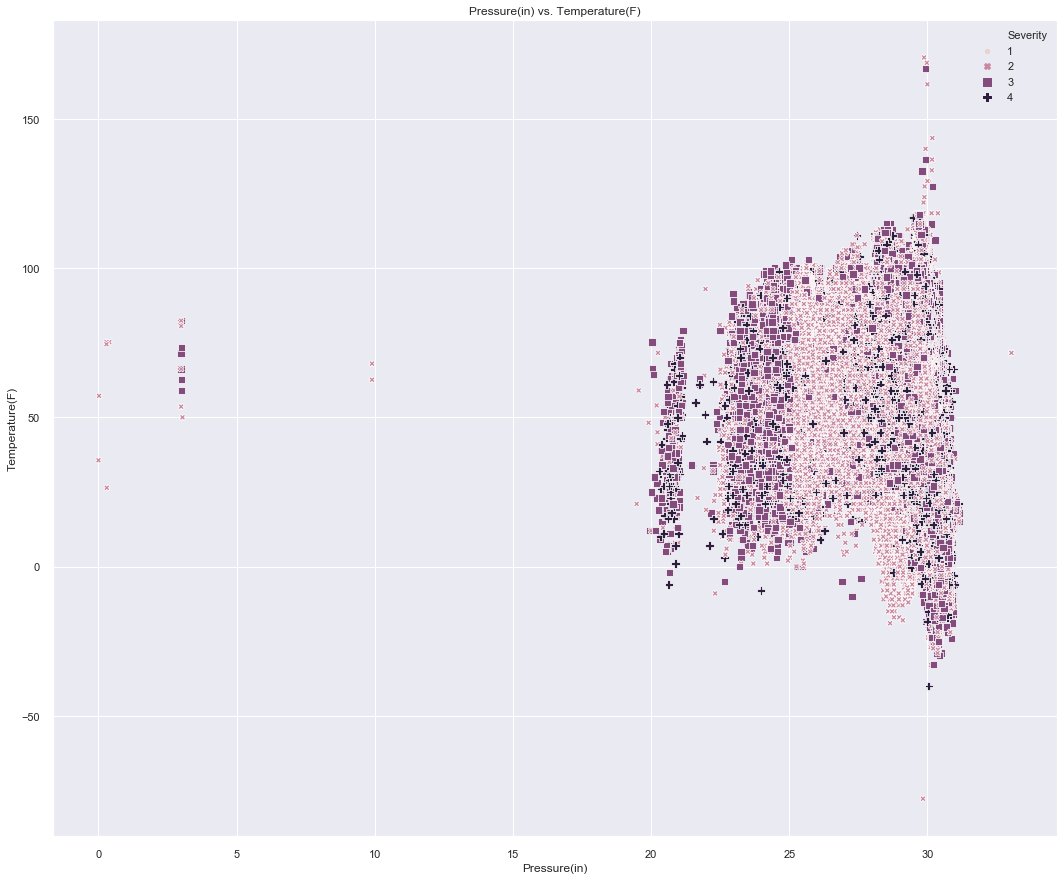

In [58]:
#Scatter plot - Pressure(in) vs. Temperature(F)

#plt.figure(figsize=(18,15))

#plt.title('Pressure(in) vs. Temperature(F)')
#sns.scatterplot(x='Pressure(in)', y='Temperature(F)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Wind Speed vs. Temperature

Most accidents seem to occur under lower windspeed conditions but to be clear, lower windspeed is relative; we suspect any wind speed values above 200 mph primarily due to the fact that the highest windspeed on earth ever recorded was 231 mph. Any accidents recorded with wind speed values above 200 mph are potential outliers and we will treat them as suspect in further analysis.  

Within the range of 0-200 mph windspeed then, we can see that accidents are more frequent under lower windspeed conditions, potentially attributable to more drivers on the road during less hazardous conditions. Factoring temperature in, we see a pattern emerge between the ~35 and 95 degree range and higher wind speed conditions. We do see less severe accidents occuring in this range as well. 

In [59]:
# Scatter plot - Wind_Speed(mph) vs. Temperature(F)

#plt.figure(figsize=(18,15))

#plt.title('Wind_Speed(mph) vs. Temperature(F)')
#sns.scatterplot(x='Wind_Speed(mph)', y='Temperature(F)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Wind Speed vs. Distance

As per the above plot, wind speed appears to contain outliers on the higher end. For this analysis, we will assume any wind speed value above 200 mph is suspect, per the highest wind speed ever on eart being recorded at 230 mph.

Within the range of 0-200 mph wind speed then, we tend to see accident frequency increase under lower windspeed conditions and higher distances driven. Conceptually this makes sense; under less hazardous conditions, folks are potentially driving further which may increase the accident rate. We also observe that the most severe accidents appear to occur with lower wind speed conditions and between 0-100 miles driven. 

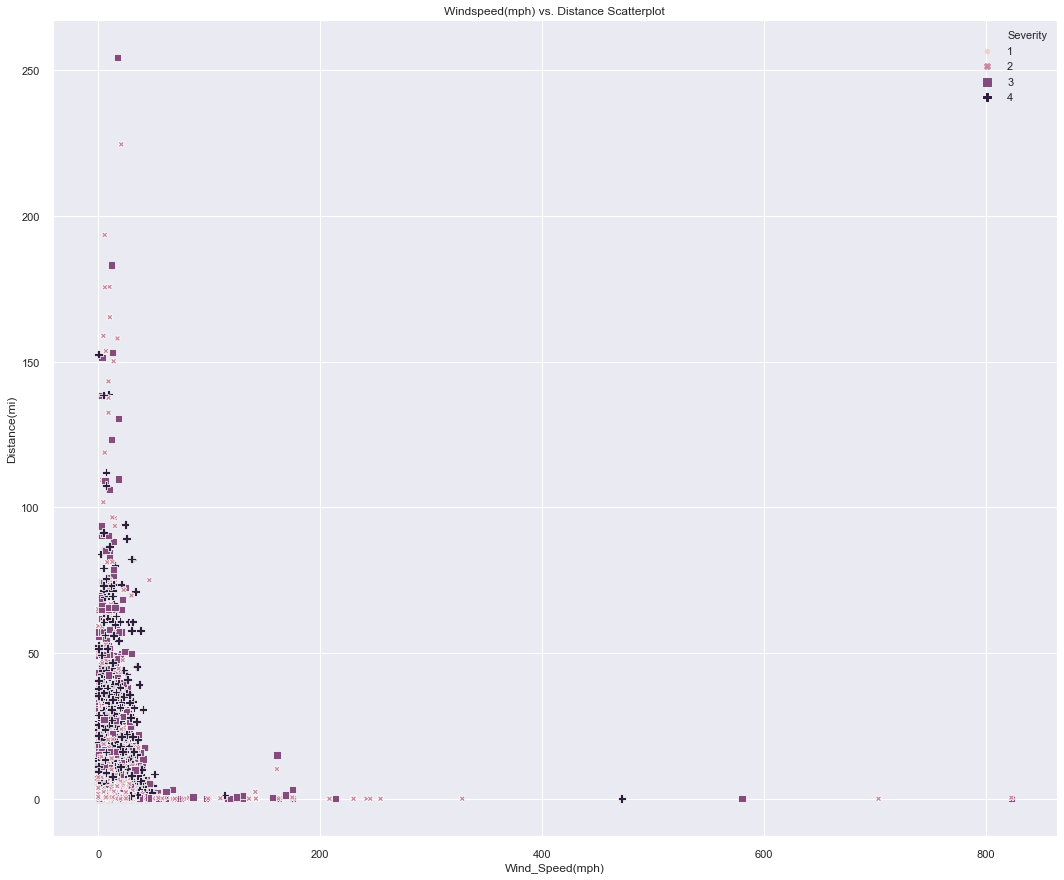

In [60]:
# Scatter plot - Windspeed vs. Distance

#plt.figure(figsize=(18,15))

#plt.title('Windspeed(mph) vs. Distance Scatterplot')
#sns.scatterplot(x='Wind_Speed(mph)', y='Distance(mi)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

### Wind Speed vs. Precipitation

As per the above plot, wind speed appears to contain outliers on the higher end. For this analysis, we will assume any wind speed value above 200 mph is suspect, per the highest wind speed ever on eart being recorded at 230 mph.

We observe two major clusters of accidents; the first occurs between 0 - ~75mph and 0-5 inches of precipitation. The second cluster appears around the 0-10 mph windspeed and 8 - 12 inches of precipitation. These two clusters likely indicate that with lower levels of precipitation, more driving - and thus more accidents occur. For the second clustering in the higher precipitation range, this may indicate a higher frequency of accidents occur with higher precipitation and milder wind speeds. We will explore this with our analysis. We see a similar effect with pressure and wind speed.


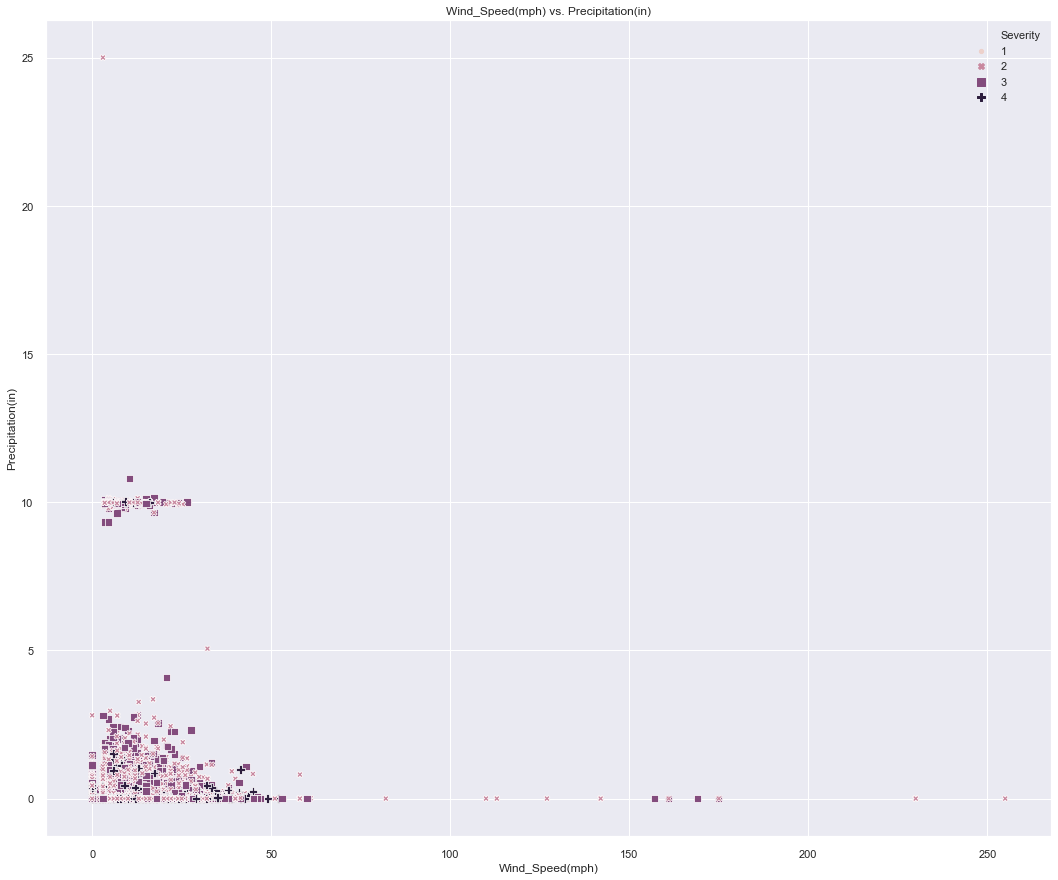

In [61]:
# Scatter plot - Wind_Speed(mph) vs. Precipitation(in)

#plt.figure(figsize=(18,15))

#plt.title('Wind_Speed(mph) vs. Precipitation(in)')
#sns.scatterplot(x='Wind_Speed(mph)', y='Precipitation(in)', 
#                hue = 'Severity', 
#                style = 'Severity', 
#                size = 'Severity',
#                data=df)

###  Association Heatmap

The plot below shows the correlation between factors in the data. 

Severity  Start_Lat  Start_Lng  Distance(mi)  \
Severity            1.000000   0.047138   0.055198      0.146393   
Start_Lat           0.047138   1.000000  -0.013672      0.069151   
Start_Lng           0.055198  -0.013672   1.000000      0.040045   
Distance(mi)        0.146393   0.069151   0.040045      1.000000   
Temperature(F)     -0.029132  -0.422737  -0.068372     -0.044638   
Wind_Chill(F)      -0.079993  -0.497549  -0.191401     -0.052012   
Humidity(%)         0.023188   0.049461   0.185338      0.018380   
Pressure(in)        0.018289  -0.079768   0.140442     -0.032545   
Visibility(mi)     -0.006136  -0.053446  -0.048123     -0.011845   
Wind_Speed(mph)     0.030343   0.052384   0.069893      0.015999   
Precipitation(in)   0.016632   0.005187   0.044698      0.001109   
PointOfInterest    -0.049221   0.041855  -0.011217     -0.016870   
Bump               -0.005455   0.003110  -0.008461      0.000258   
Crossing           -0.129030  -0.018875   0.012130     -0.043012   
Yield              -0.007847  -0.001728   0.015783     -0.002829   
Junction            0.063437   0.034507  -0.058664      0.032723   
No_Exit            -0.006709  -0.000012  -0.003308     -0.002906   
Railway            -0.023666  -0.000383  -0.025507     -0.012114   
Roundabout         -0.003843   0.000324   0.000243     -0.001176   
Station            -0.052094   0.005559  -0.009206     -0.022130   
Stop               -0.055394   0.012996  -0.039732     -0.011208   
Traffic_Calming    -0.006786   0.009101  -0.006420     -0.001108   
Traffic_Signal     -0.195834  -0.094739   0.081986     -0.069962   
Turning_Loop             NaN        NaN        NaN           NaN   
Start_Year         -0.050269   0.029134  -0.003773      0.009509   
Start_Day           0.002681  -0.000635   0.002085     -0.000234   
Start_Hour          0.024906  -0.016852  -0.042848     -0.000449   
End_Year           -0.050165   0.029190  -0.003769      0.009564   
End_Day             0.002829  -0.000559   0.002261     -0.000140   
End_Hour           -0.006963  -0.017934  -0.028463      0.005140   
Time_Duration(min)  0.018431   0.009183   0.001713      0.016291   

                    Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Severity                 -0.029132      -0.079993     0.023188      0.018289   
Start_Lat                -0.422737      -0.497549     0.049461     -0.079768   
Start_Lng                -0.068372      -0.191401     0.185338      0.140442   
Distance(mi)             -0.044638      -0.052012     0.018380     -0.032545   
Temperature(F)            1.000000       0.994869    -0.327122     -0.072190   
Wind_Chill(F)             0.994869       1.000000    -0.308035     -0.235248   
Humidity(%)              -0.327122      -0.308035     1.000000      0.091434   
Pressure(in)             -0.072190      -0.235248     0.091434      1.000000   
Visibility(mi)            0.175596       0.190564    -0.377845     -0.020050   
Wind_Speed(mph)          -0.029893      -0.192466    -0.133499      0.017755   
Precipitation(in)        -0.013120      -0.036659     0.061062      0.039764   
PointOfInterest          -0.003224      -0.004191    -0.002681      0.010020   
Bump                     -0.000087       0.002761    -0.001886     -0.005220   
Crossing                  0.028324       0.029448    -0.031930     -0.012027   
Yield                    -0.000564      -0.000019     0.003124      0.001191   
Junction                 -0.007453      -0.015242    -0.006833      0.026430   
No_Exit                   0.003662       0.004638    -0.008213     -0.006367   
Railway                   0.005254       0.014252    -0.001758      0.008985   
Roundabout               -0.001117      -0.001561     0.001553      0.001737   
Station                   0.006028       0.000604    -0.001934      0.016550   
Stop                      0.000616       0.009800    -0.013217     -0.009364   
Traffic_Calming          -0.001611       0.001751     0.000339     -0.000685   
Tra

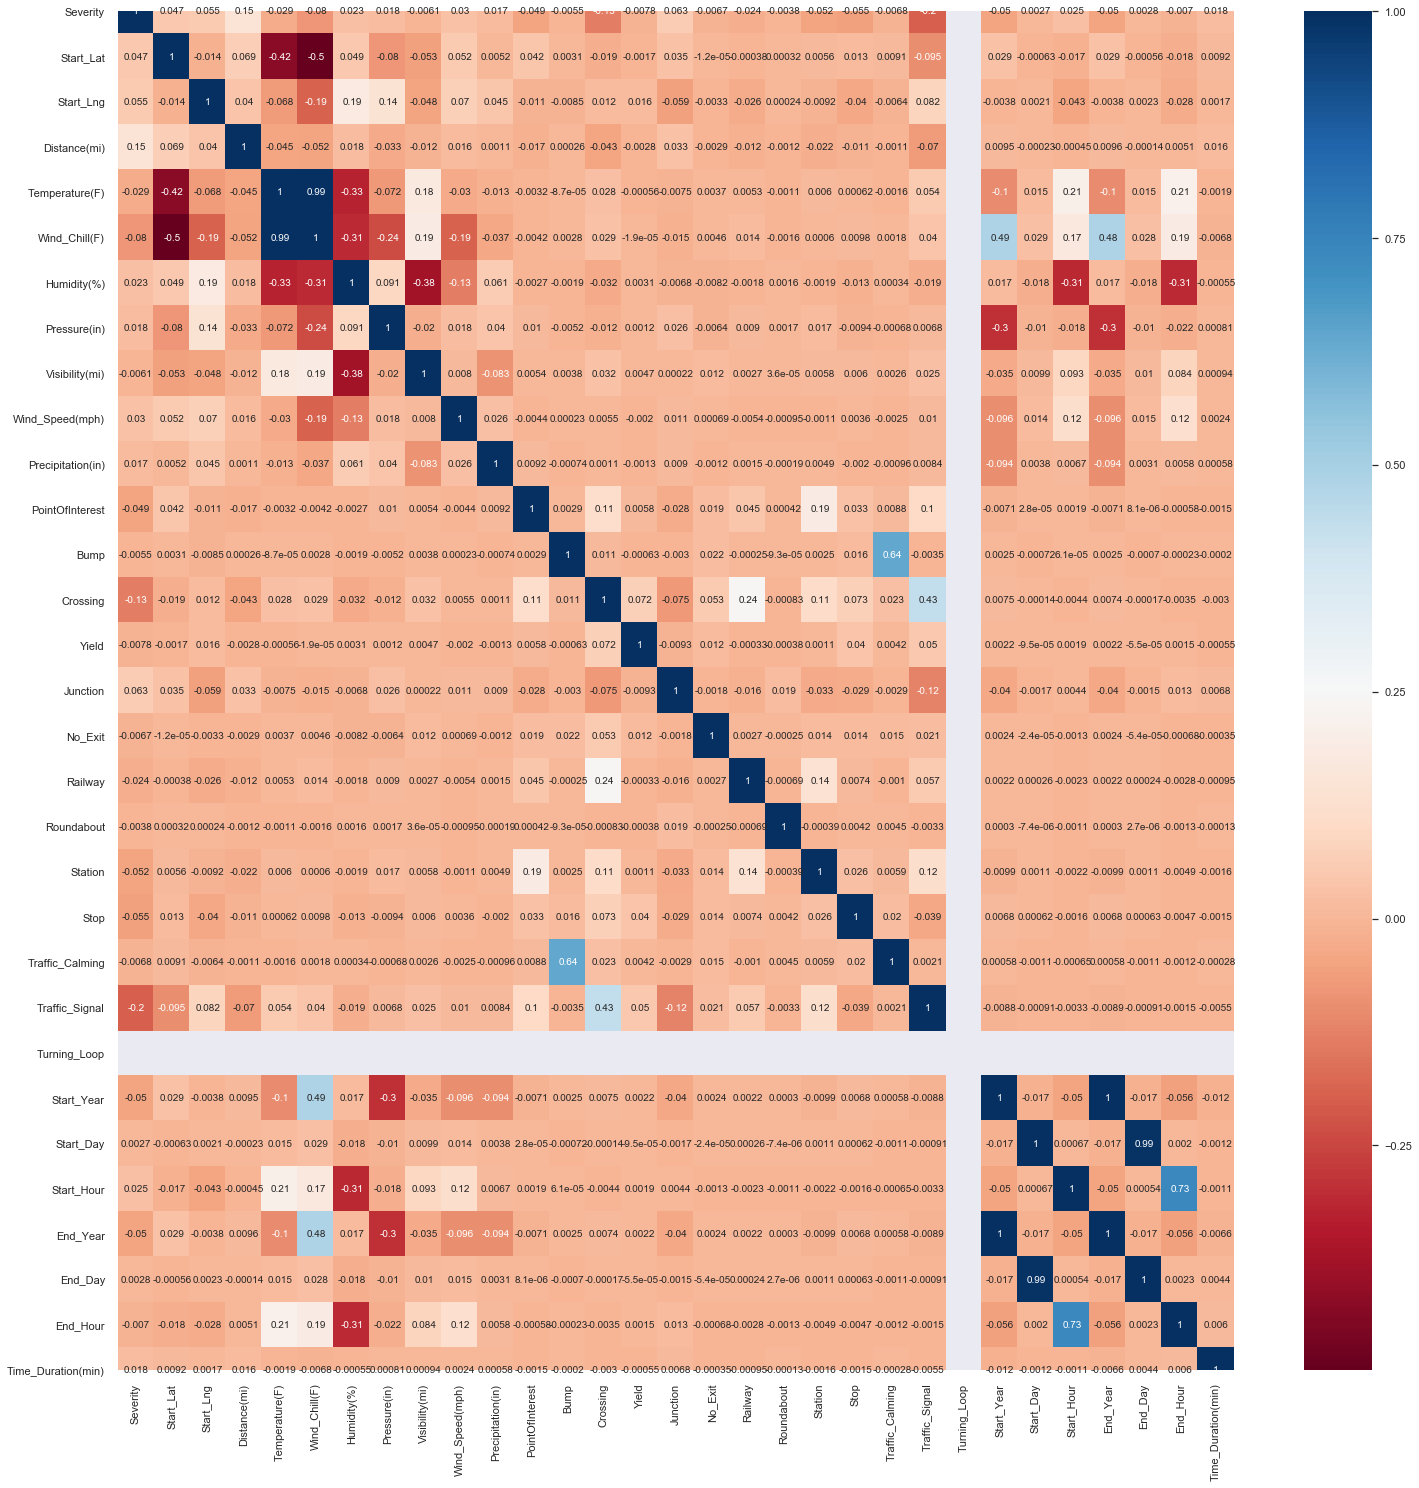

In [62]:
# Severity heatmap
#plt.figure(figsize=(25,25))
#c= df.corr()
#sns.heatmap(c,cmap='RdBu',annot=True)
#c

## Relationship Exploration - 10 pts

Many interesting relationships have been found while analyzing the data. When attempting to predict the severity of an accident we have seen in the relationship plots above that the type of weather has a relationship on the severity of the accident. We see more severity 2 accidents on clear days, then more severity 3 accidents and a few severity 4 accidents. Similar trends were seen when looking at the state the accident occurred in. In general, the higher the population of the state the more frequent a severity 2 accident were to occur. The same pattern occurred for severity 3 accidents as well. 

## Relationship Exploration - Severity

In our dataset, Severity is an ordinal variable that describes the severity of the accident. We may wish use machine learning methods to classify accidents into the four levels -- 1/light to 4/extreme severity -- to be able to provide civic institutions information on when, where, and during what weather do the most severe accidents occur.

As we would hope, level 4 accidents don't occur often, at a rate of 0.2% as shown in the table below. An interesting aspect of this data is that almost all of the accidents are concentrated in the 2's and 3's. Less than 1% of accidents are classified as a level 1.

In [63]:
sev0=df.groupby("Severity").count().ID
sev0=sev0.to_frame()
sev1=df.groupby("Severity").count().ID / df.count().ID
sev1=sev1.to_frame()

sev2=sev0.merge(sev1, on="Severity").rename(columns={"ID_x": "Count", "ID_y": "Pct"})
sev2.style.format({
    'Severity': '{:.0}',
    'Count': '{:,d}',
    'Pct': '{:,.1%}'.format,
})

We looked at how various weather elements were associated with severity, as shown in the table below. Our preliminary findings were:
* As visibility decreases, the severity of the accident increases
* As temperature decreases, the severity of the accident increases
    - As a next step, we would like to layer on month or season to see if this is always the case or if accidents are worse in cold seasons
* More severe accidents affect larger stretches of road
* As the wind speed increases, the severity of the accident increases
* The effects of precipitation, pressure, and humidity on accident severity are inconclusive

In [64]:
df.columns = df.columns.str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('%','')
vis=df.groupby("Severity").mean().Visibilitymi
vis=vis.to_frame()
# Visiblity is lower when the severity is higher

temp=df.groupby("Severity").mean().TemperatureF
temp=temp.to_frame()
# Temperature is lower when the severity is higher

dist=df.groupby("Severity").mean().Distancemi
dist=dist.to_frame()
# More severe accidents affect larger areas

precip=df[df["Precipitationin"]>0]
precip=precip.groupby("Severity").mean().Precipitationin
precip=precip.to_frame()
# When there is precipitation, the amount does not appear to be correlated with severity

wind=df.groupby("Severity").mean().Wind_Speedmph
wind=wind.to_frame()
# Higher severity may be linked to higher wind speeds

pres=df.groupby("Severity").mean().Pressurein
pres=pres.to_frame()
# Effect of pressure less clear

hum=df.groupby("Severity").mean().Humidity
hum=hum.to_frame()
# Effect of humidity less clear

by_severity = pd.concat([vis, temp, dist, wind, precip, pres, hum], axis=1)
by_severity.style.format({
    'Visibilitymi': '{:,.2f}',
    'TemperatureF': '{:,.2f}',
    'Distancemi': '{:,.2f}',
    'Wind_Speedmph': '{:,.2f}',
    'Precipitationin': '{:,.2f}',
    'Pressurein': '{:,.2f}',    
    'Humidity': '{:,.2f}',
})

From the information above, we can see that certain aspects of the weather may be important to how severe a traffic accident is. Below, we show the count and frequency of accidents by severity and season. We see that the more severe accidents occur in the fall, while the least severe accidents occur in the summer. Because in this dataset "severe" means "impact to traffic", the least severe accidents occuring in the summer may be due to reduced traffic in the summer.

In [65]:
def getSeason(date):
    month=pd.to_datetime(date).month
    if month <= 3:
        return 'Winter'
    elif month <= 6:
        return 'Spring'
    elif month <= 9:
        return 'Summer'
    else:
        return 'Fall'

In [66]:
df['Season'] = df['Start_Date'].swifter.apply(getSeason)

C:\Users\croomb\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [67]:
#df['Season']=season

In [68]:
freq_table = pd.crosstab(index=df["Severity"], columns=df["Season"], margins=True)
freq_table.columns.values[4]='All Seasons'
freq_table.index.values[4]='All Sev'
freq_table.style.format({
    'Fall': '{:,.0f}',
    'Spring': '{:,.0f}',
    'Summer': '{:,.0f}',
    'Winter': '{:,.0f}',
    'All Seasons': '{:,.0f}'
})

In [69]:
freq_table.div(freq_table["All Seasons"],axis=0).style.format({
    'Fall': '{:,.1%}',
    'Spring': '{:,.1%}',
    'Summer': '{:,.1%}',
    'Winter': '{:,.1%}',
    'All Seasons': '{:,.0%}'
})

## Other Features - 5 pts

There are possibilities for new features to be added to this data set, some of which have already been added:

- Time Duration - this feature was created to make accident start/stop calculations easier
- Date/Time manipulations - the team created individual features for the component parts of the start and end times. This aided in analysis of accident data for various time based purposes and allowed for seeing trends at various levels of time.
- Twilight Classification - the team has discussed a new feature to leverage the three twilight classifications features currently available. The team feels that three features may be to many and that the values could be combined into a single feature

## Exceptional Work - 10 pts

With respect to exepectional work, the team feels the following constitutes this category:

- The Power BI charts for additional data analysis
- The implementation of test and training splits